In [404]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [405]:
# Загрузка данных
df = pd.read_excel('D:\\notebooks\\sem2\\Classic_MO\\course\\Данные_для_курсовои_Классическое_МО.xlsx')

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


Все переменные числовые

In [407]:
df.head()

Unnamed: 0    IC50, mM    CC50, mM         SI  MaxAbsEStateIndex  \
0           0    6.239374  175.482382  28.125000           5.094096   
1           1    0.771831    5.402819   7.000000           3.961417   
2           2  223.808778  161.142320   0.720000           2.627117   
3           3    1.705624  107.855654  63.235294           5.097360   
4           4  107.131532  139.270991   1.300000           5.150510   

   MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed        SPS  \
0        5.094096           0.387225        0.387225  0.417362  42.928571   
1        3.961417           0.533868        0.533868  0.462473  45.214286   
2        2.627117           0.543231        0.543231  0.260923  42.187500   
3        5.097360           0.390603        0.390603  0.377846  41.862069   
4        5.150510           0.270476        0.270476  0.429038  36.514286   

   ...  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  \
0  ...           0             0           0                  0             0   
1  ...           0             0           0                  0             0   
2  ...           0             0           0                  0             0   
3  ...           0             0           0                  0             0   
4  ...           0             0           0                  0             0   

   fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  fr_urea  
0            0            0             0                 3        0  
1            0            0             0                 3        0  
2            0            0             0                 3        0  
3            0            0             0                 4        0  
4            0            0             0                 0        0  

[5 rows x 214 columns]

In [408]:
constant_columns = [col for col in df.columns if df[col].nunique() == 1]

print("Константные столбцы:", constant_columns)

Константные столбцы: ['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_N_O', 'fr_SH', 'fr_azide', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_isocyan', 'fr_isothiocyan', 'fr_lactam', 'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd', 'fr_thiocyan']


Столбцы с одним значением никак не будут влиять на предсказание, поэтому удаляем

In [409]:
df = df.drop(columns=constant_columns)

In [410]:
df.head()

Unnamed: 0    IC50, mM    CC50, mM         SI  MaxAbsEStateIndex  \
0           0    6.239374  175.482382  28.125000           5.094096   
1           1    0.771831    5.402819   7.000000           3.961417   
2           2  223.808778  161.142320   0.720000           2.627117   
3           3    1.705624  107.855654  63.235294           5.097360   
4           4  107.131532  139.270991   1.300000           5.150510   

   MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed        SPS  \
0        5.094096           0.387225        0.387225  0.417362  42.928571   
1        3.961417           0.533868        0.533868  0.462473  45.214286   
2        2.627117           0.543231        0.543231  0.260923  42.187500   
3        5.097360           0.390603        0.390603  0.377846  41.862069   
4        5.150510           0.270476        0.270476  0.429038  36.514286   

   ...  fr_quatN  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
0  ...         0           0             0           0                  0   
1  ...         0           0             0           0                  0   
2  ...         2           0             0           0                  0   
3  ...         0           0             0           0                  0   
4  ...         0           0             0           0                  0   

   fr_tetrazole  fr_thiazole  fr_thiophene  fr_unbrch_alkane  fr_urea  
0             0            0             0                 3        0  
1             0            0             0                 3        0  
2             0            0             0                 3        0  
3             0            0             0                 4        0  
4             0            0             0                 0        0  

[5 rows x 196 columns]

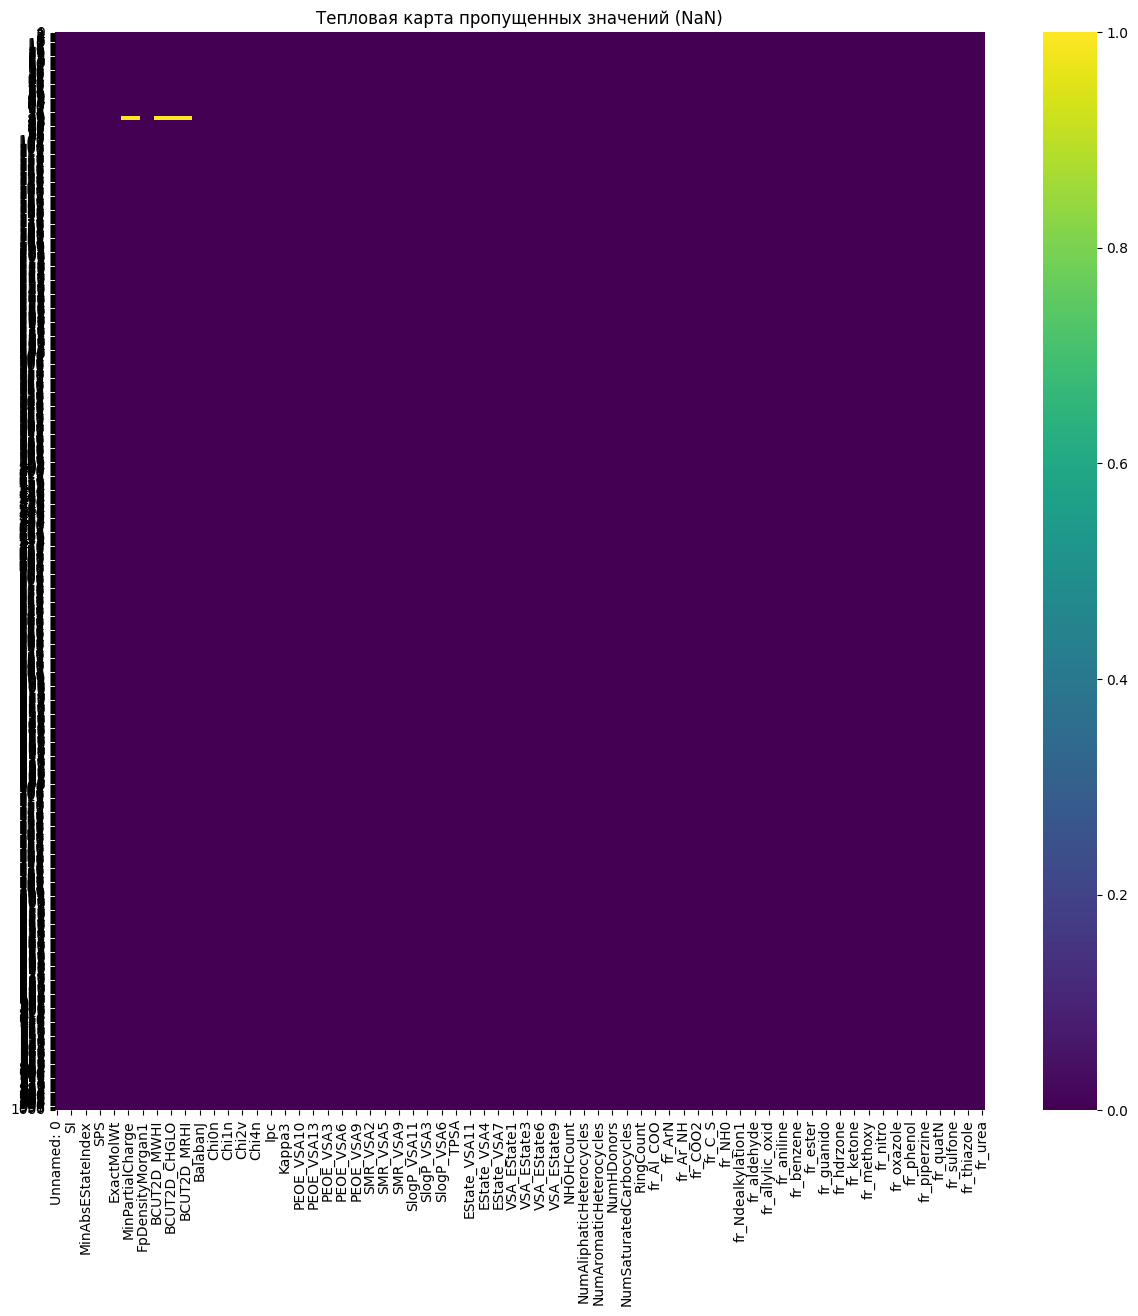

In [411]:
plt.figure(figsize=(15, 14))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=True)
plt.title('Тепловая карта пропущенных значений (NaN)')
plt.show()

Выведем индексы строк с пропущенными значениями и количество таких значений

In [412]:
df[df.isnull().any(axis=1)].isnull().sum(axis=1)

78    12
79    12
80    12
dtype: int64

Заменим все nan на 0 и удалим столбец Unnamed: 0 (дублирует индексы)

In [413]:
df = df.fillna(0)
df = df.drop(columns=['Unnamed: 0'])

In [414]:
df.head()

IC50, mM    CC50, mM         SI  MaxAbsEStateIndex  MaxEStateIndex  \
0    6.239374  175.482382  28.125000           5.094096        5.094096   
1    0.771831    5.402819   7.000000           3.961417        3.961417   
2  223.808778  161.142320   0.720000           2.627117        2.627117   
3    1.705624  107.855654  63.235294           5.097360        5.097360   
4  107.131532  139.270991   1.300000           5.150510        5.150510   

   MinAbsEStateIndex  MinEStateIndex       qed        SPS    MolWt  ...  \
0           0.387225        0.387225  0.417362  42.928571  384.652  ...   
1           0.533868        0.533868  0.462473  45.214286  388.684  ...   
2           0.543231        0.543231  0.260923  42.187500  446.808  ...   
3           0.390603        0.390603  0.377846  41.862069  398.679  ...   
4           0.270476        0.270476  0.429038  36.514286  466.713  ...   

   fr_quatN  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
0         0           0             0           0                  0   
1         0           0             0           0                  0   
2         2           0             0           0                  0   
3         0           0             0           0                  0   
4         0           0             0           0                  0   

   fr_tetrazole  fr_thiazole  fr_thiophene  fr_unbrch_alkane  fr_urea  
0             0            0             0                 3        0  
1             0            0             0                 3        0  
2             0            0             0                 3        0  
3             0            0             0                 4        0  
4             0            0             0                 0        0  

[5 rows x 195 columns]

# Сформируем данные для регрессий.

Взглянем на выбросы и удалим их

In [415]:
# Функция для удаления выбросов по IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] <= upper_bound)]

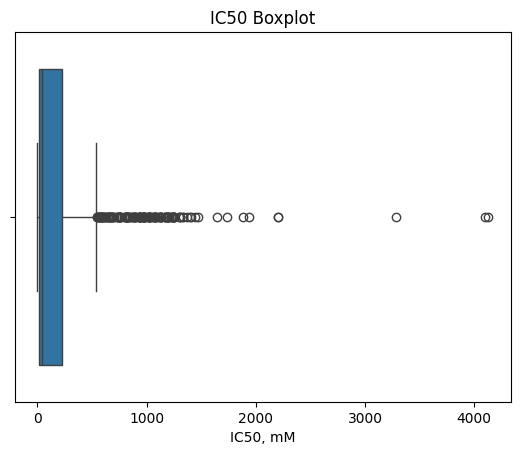

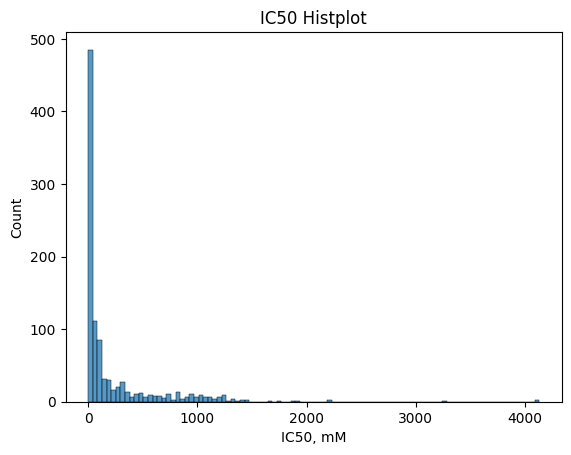

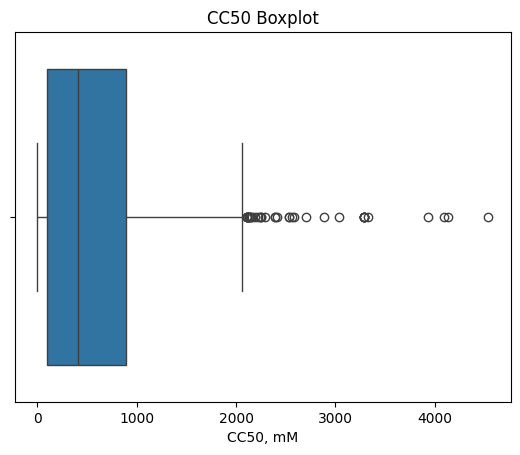

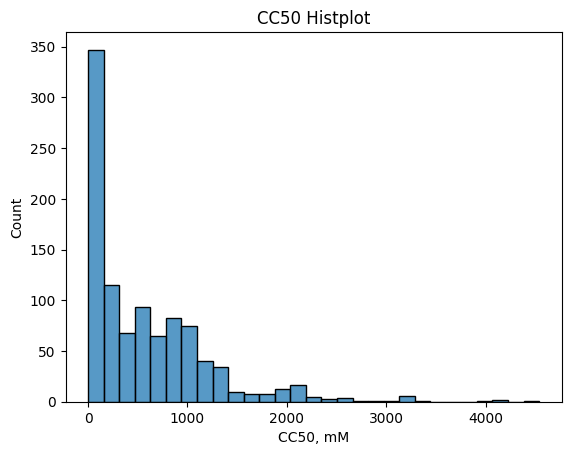

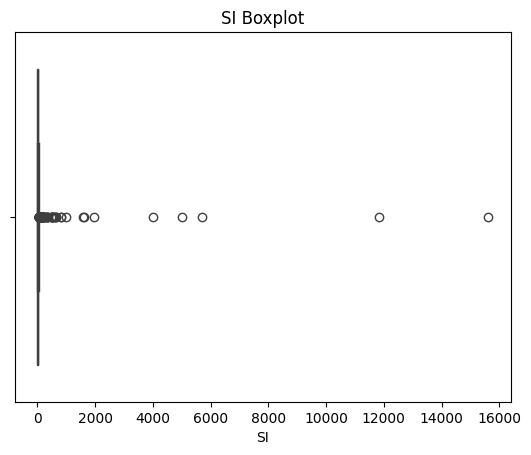

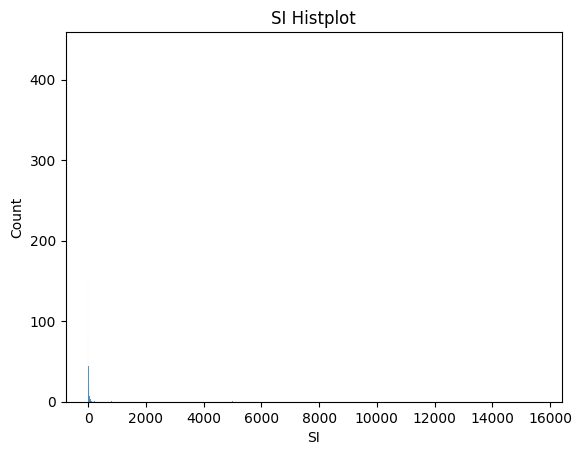

In [416]:
sns.boxplot(data=df['IC50, mM'], orient='h')
plt.title("IC50 Boxplot")
plt.show()

sns.histplot(data=df['IC50, mM'])
plt.title("IC50 Histplot")
plt.show()

sns.boxplot(data=df['CC50, mM'], orient='h')
plt.title("CC50 Boxplot")
plt.show()

sns.histplot(data=df['CC50, mM'])
plt.title("CC50 Histplot")
plt.show()

sns.boxplot(data=df['SI'], orient='h')
plt.title("SI Boxplot")
plt.show()

sns.histplot(data=df['SI'])
plt.title("SI Histplot")
plt.show()

Все три целевые переменные имеют экспоненциальное распределение. Удалим выбросы выше Q3

Дальнейшая работа при обучении показала, что удаление выше Q3 улучшает метрики

In [417]:
# Удаление выбросов
df_IC50 = remove_outliers_iqr(df, 'IC50, mM').drop(columns=['CC50, mM', 'SI'])
df_IC50 = remove_outliers_iqr(df, 'IC50, mM')
df_CC50 = remove_outliers_iqr(df, 'CC50, mM').drop(columns=['IC50, mM', 'SI'])
df_CC50 = remove_outliers_iqr(df, 'CC50, mM')
df_SI = remove_outliers_iqr(df, 'SI').drop(columns=['IC50, mM', 'CC50, mM'])
df_SI = remove_outliers_iqr(df, 'SI')

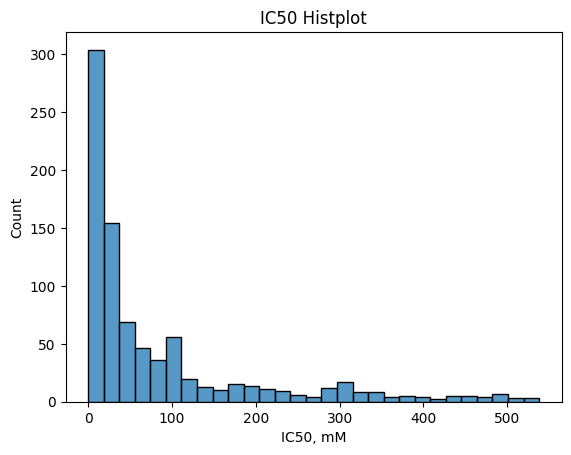

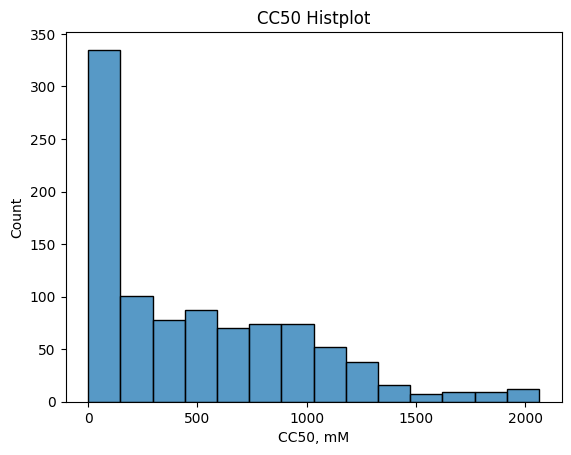

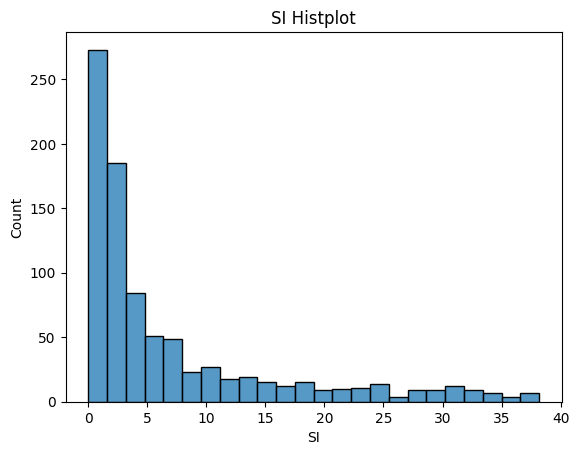

In [418]:
sns.histplot(data=df_IC50['IC50, mM'])
plt.title("IC50 Histplot")
plt.show()

sns.histplot(data=df_CC50['CC50, mM'])
plt.title("CC50 Histplot")
plt.show()

sns.histplot(data=df_SI['SI'])
plt.title("SI Histplot")
plt.show()

## Посмотрим на корреляционные матрицы для целевых переменных:

In [419]:
corr_IC50 = df_IC50.corr()
corr_CC50 = df_CC50.corr()
corr_SI = df_SI.corr()

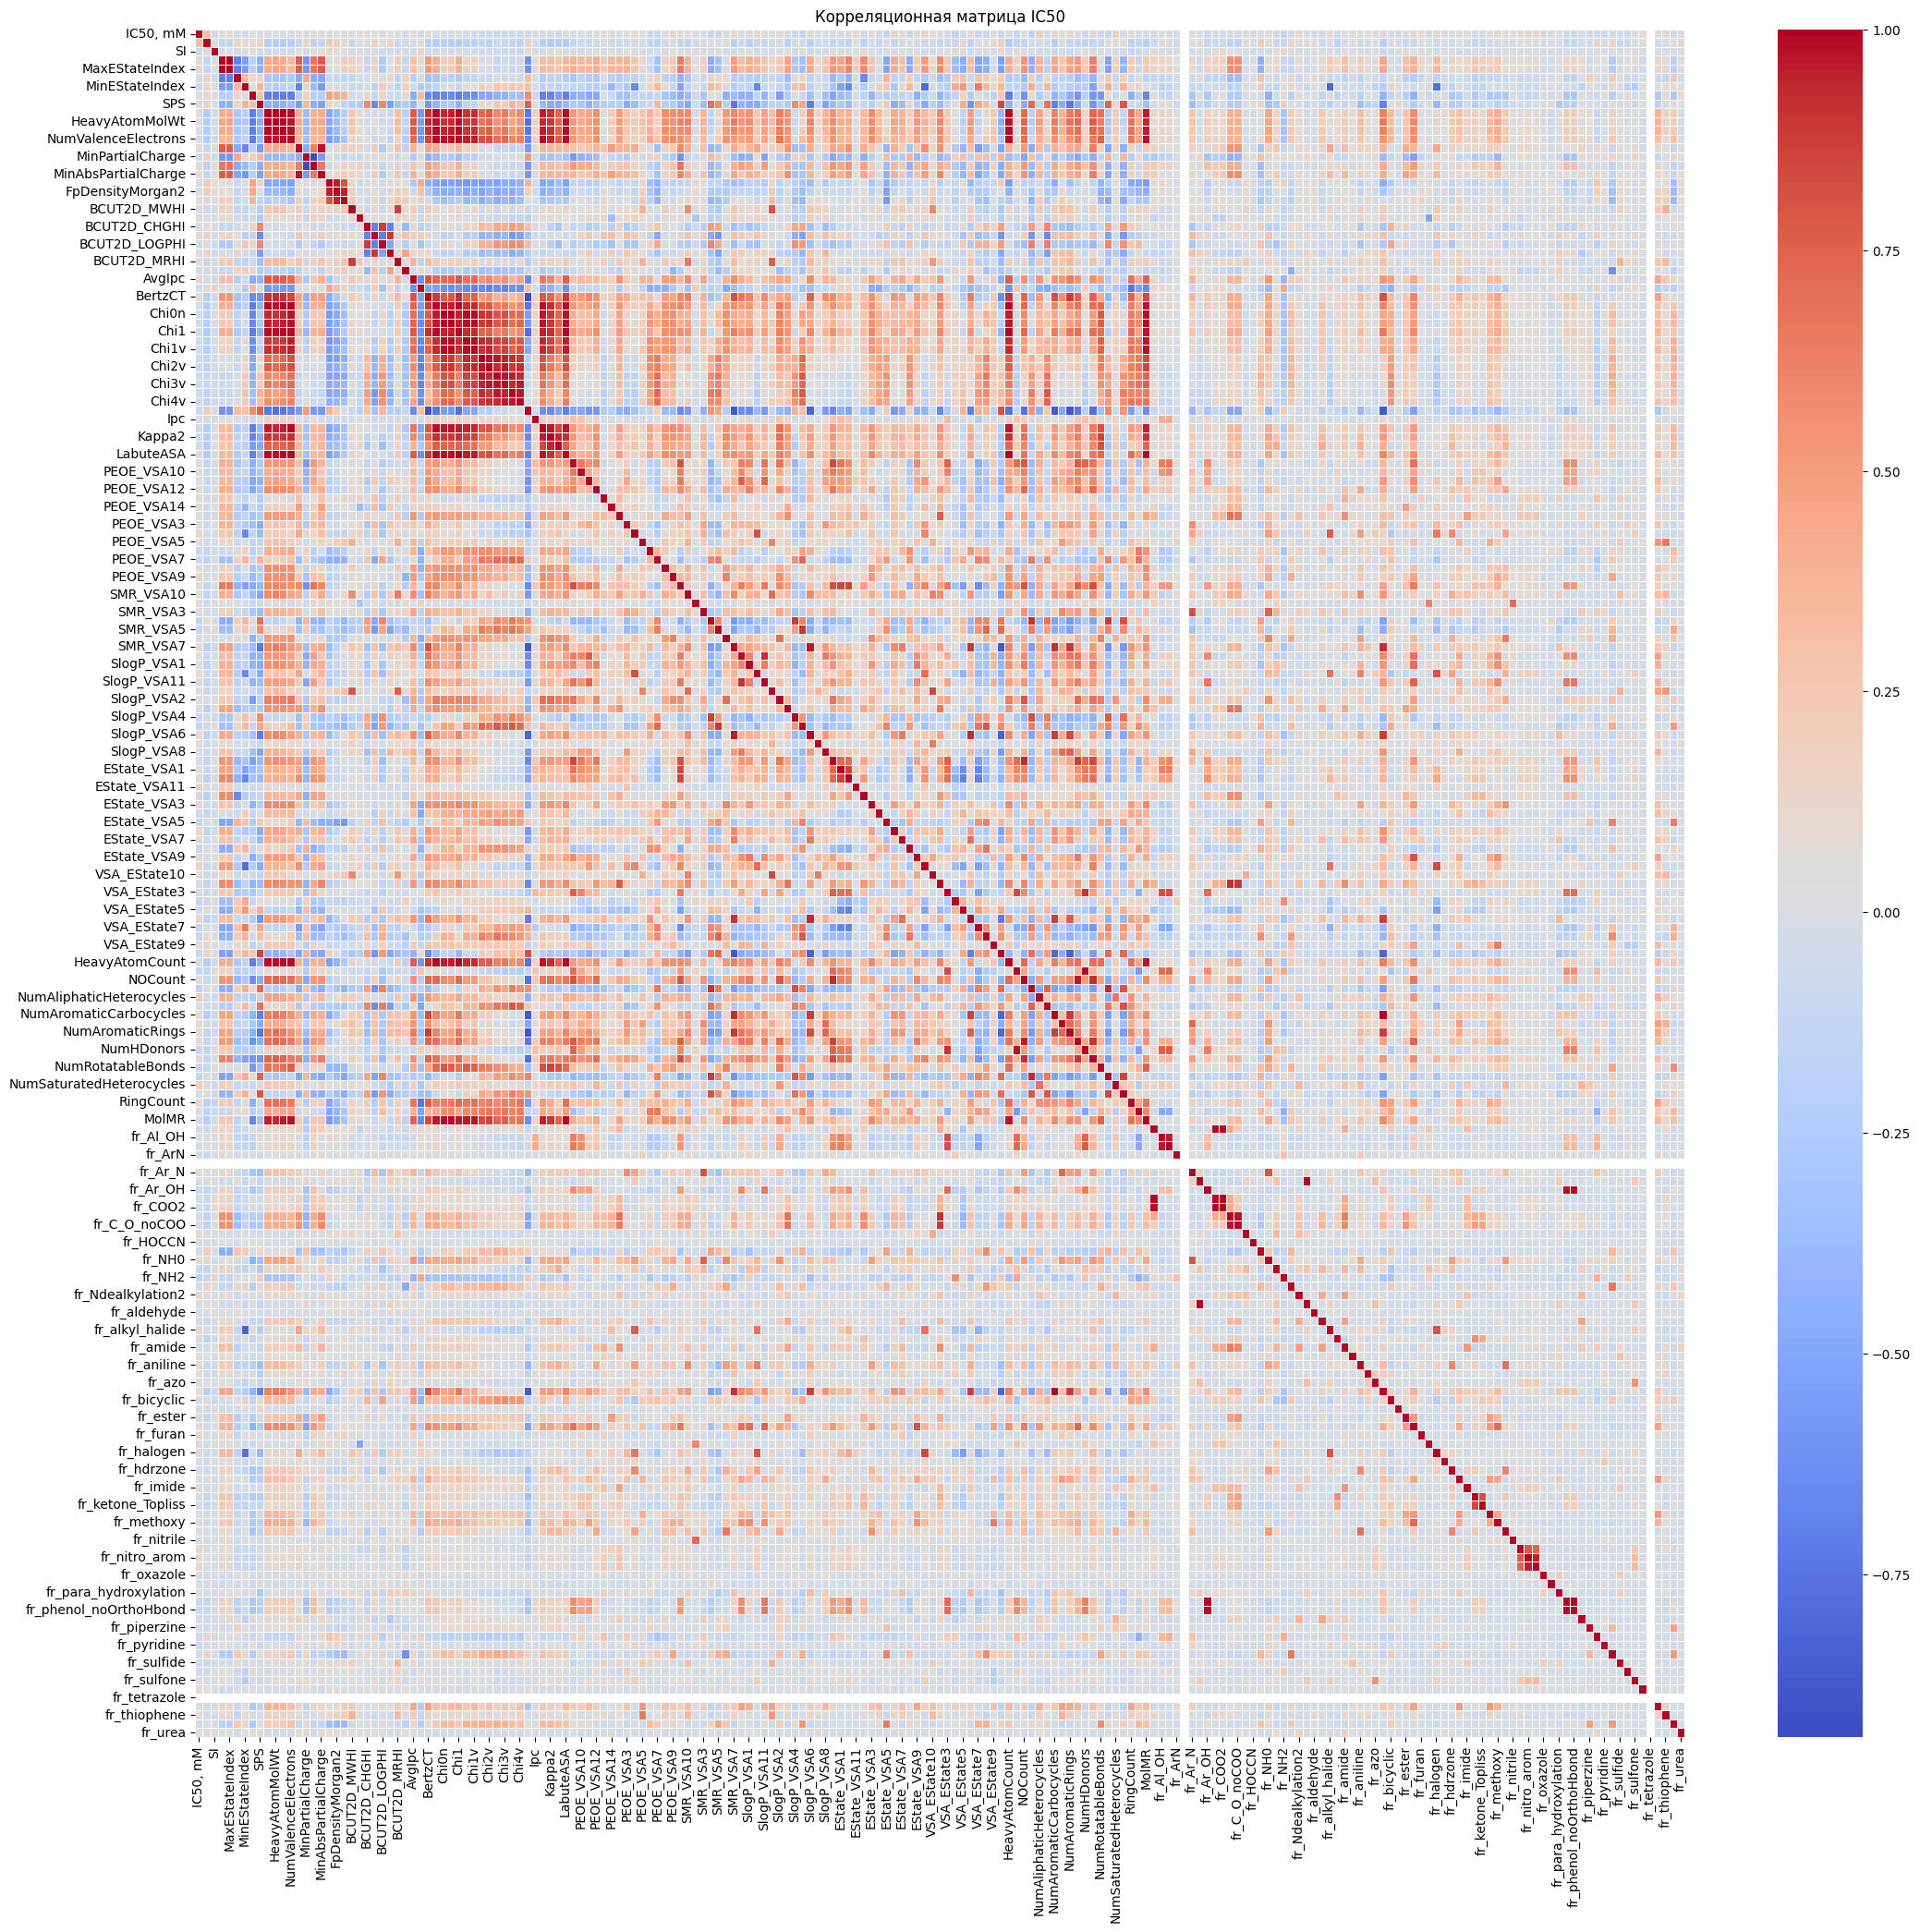

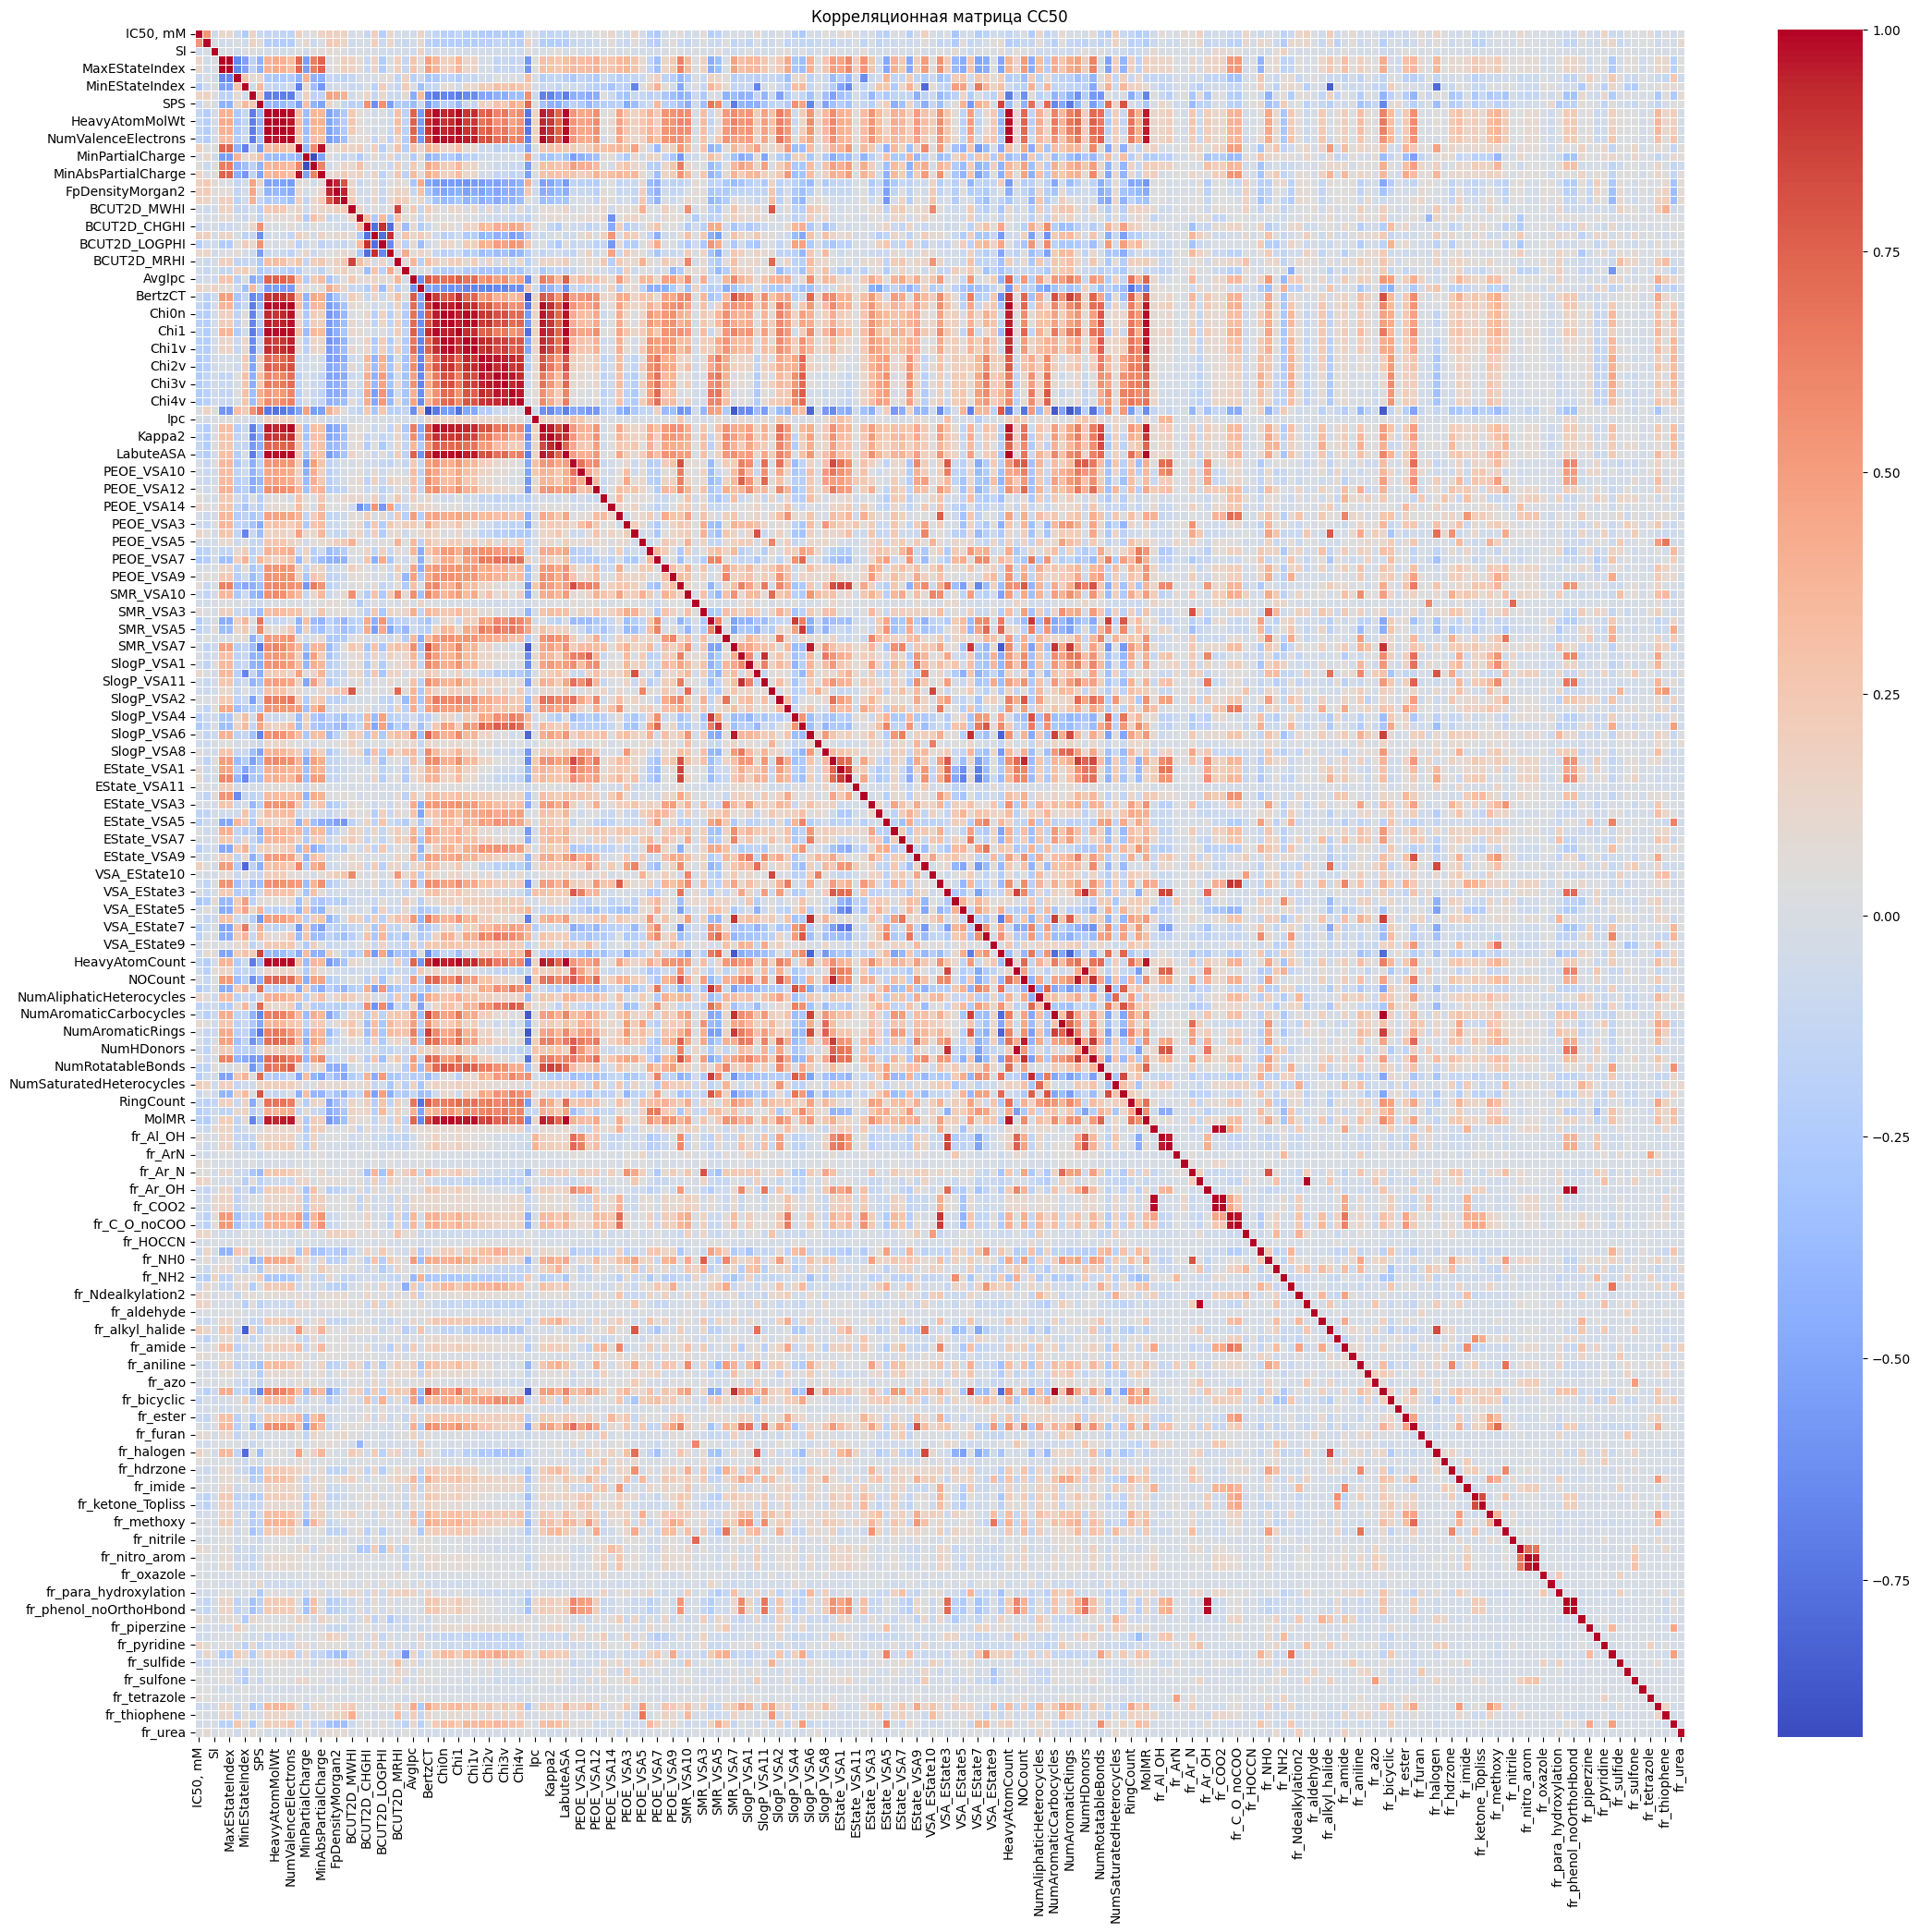

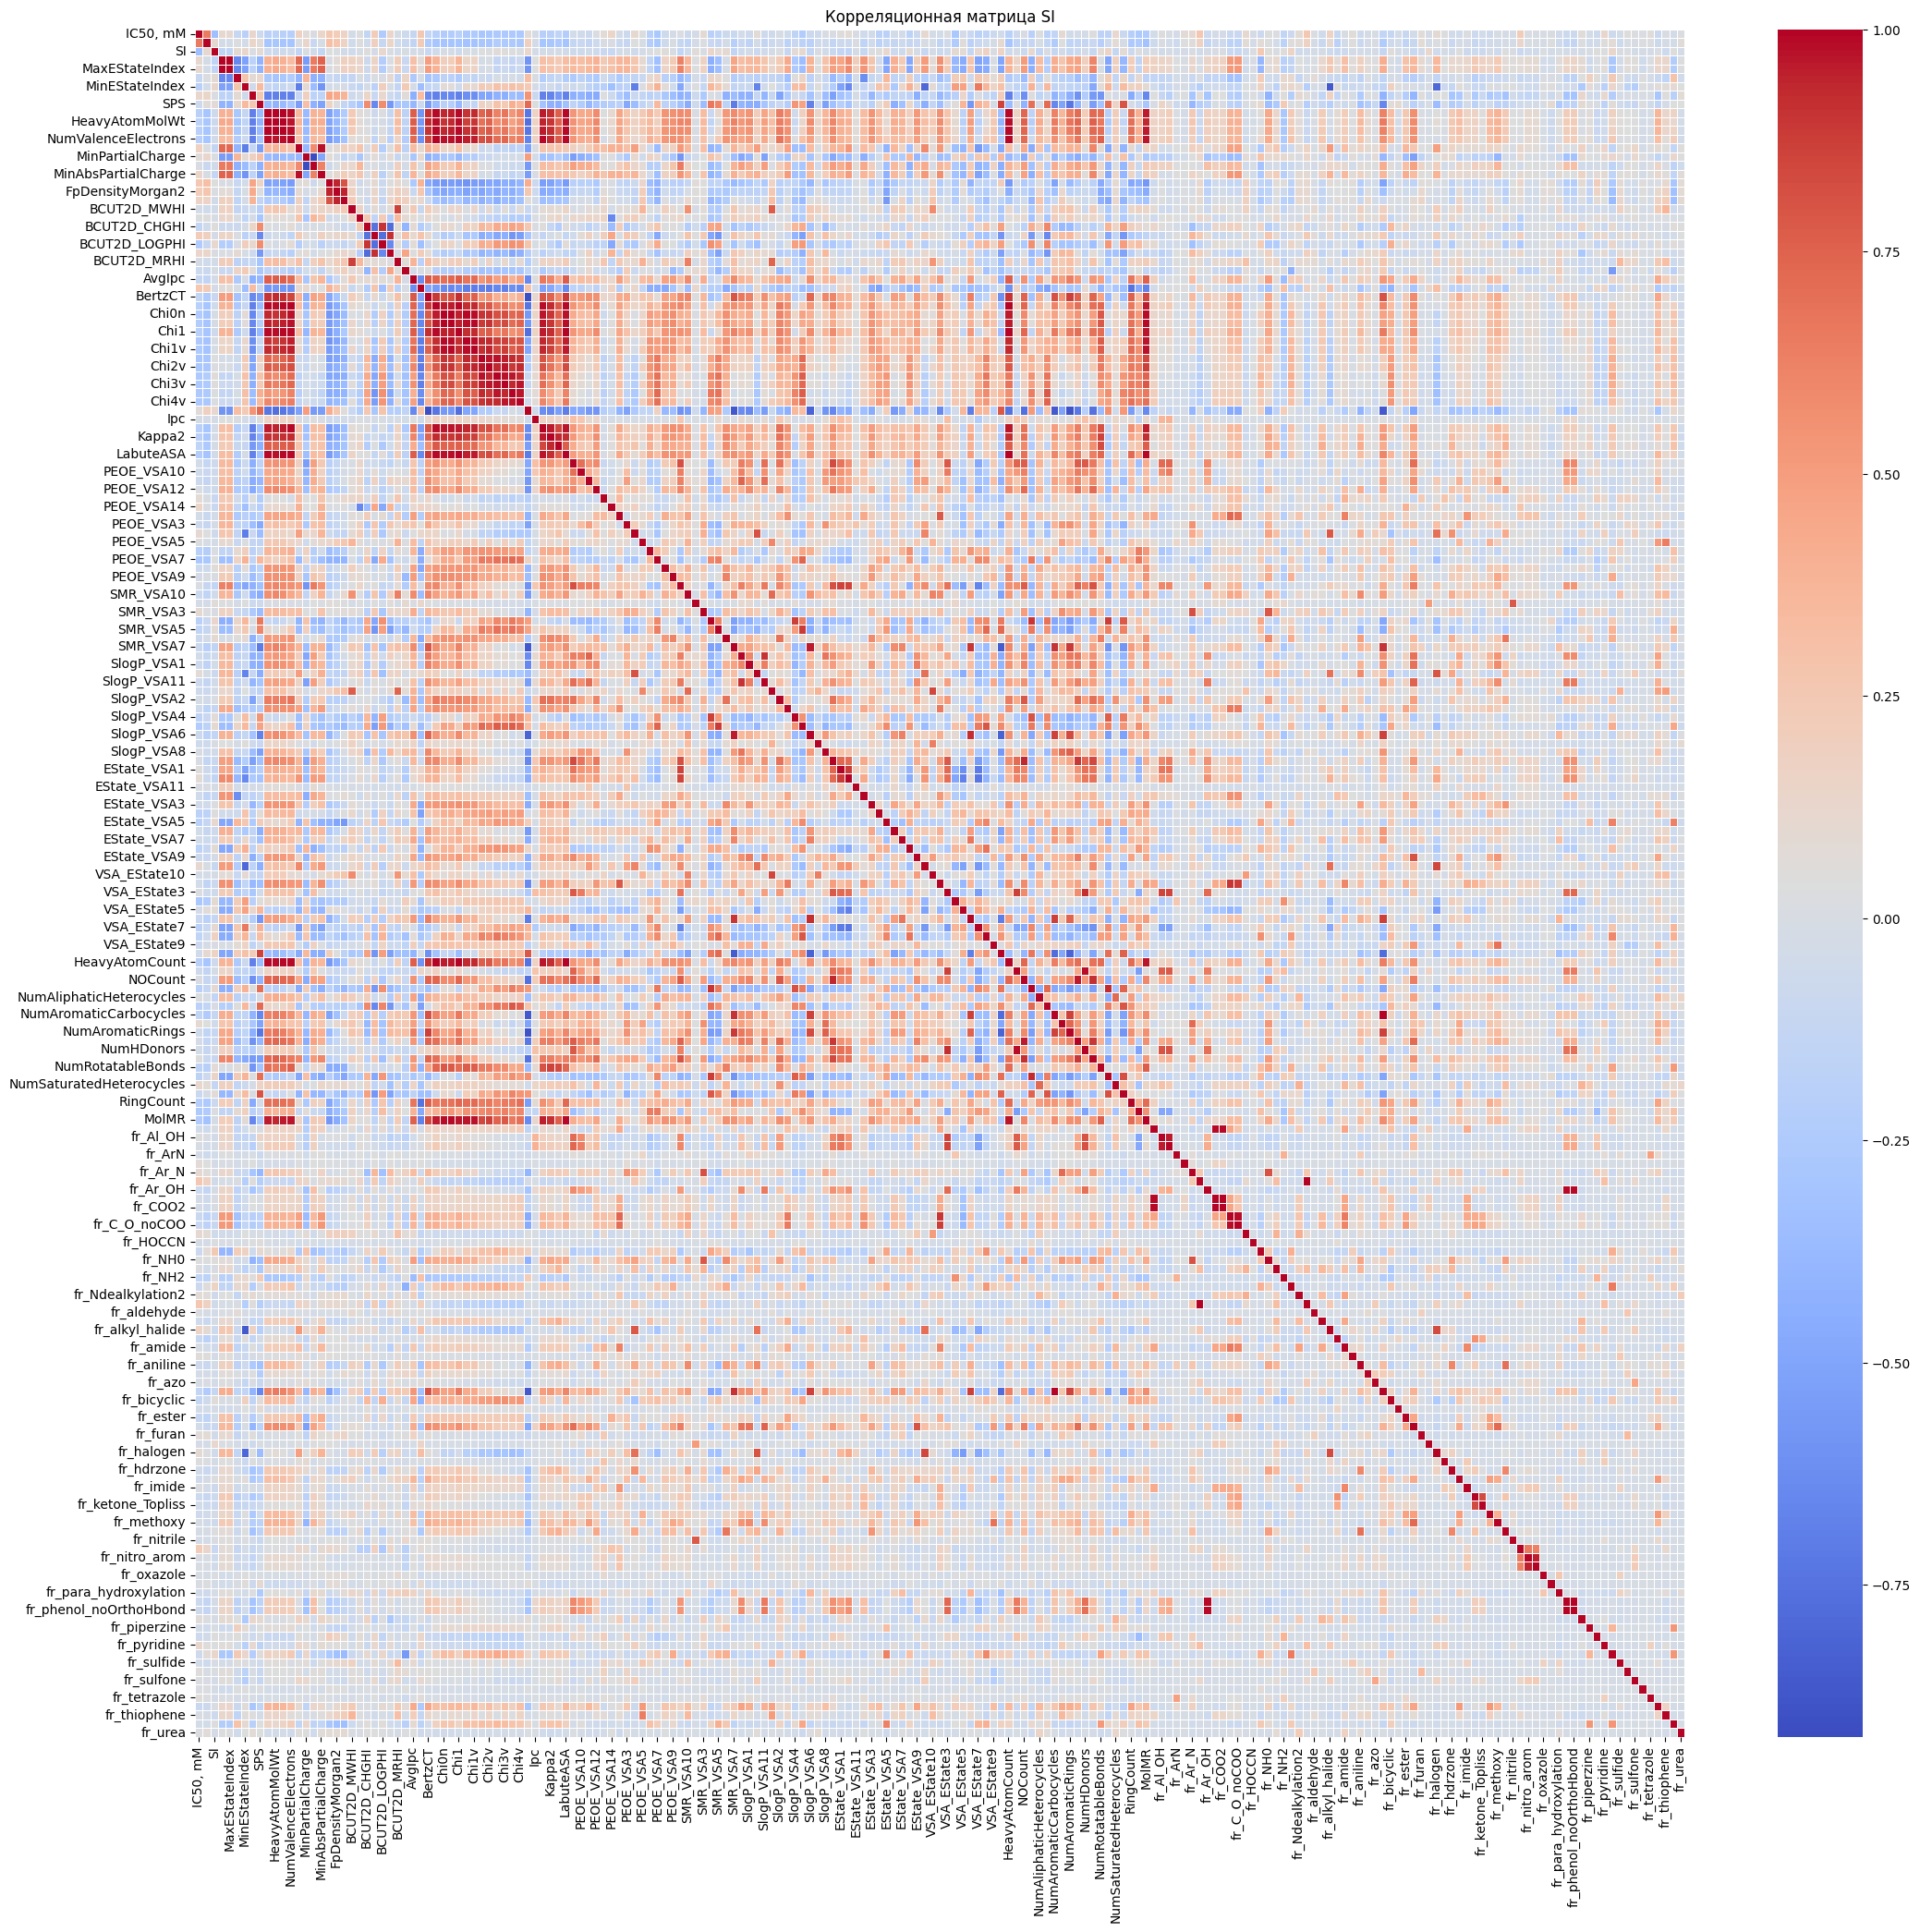

In [420]:
plt.figure(figsize=(26, 24))
sns.heatmap(corr_IC50, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица IC50')
plt.show()

plt.figure(figsize=(26, 24))
sns.heatmap(corr_CC50, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица CC50')
plt.show()

plt.figure(figsize=(26, 24))
sns.heatmap(corr_SI, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица SI')
plt.show()

Посмотрим на значения коэффициентов с целевыми переменными:

In [421]:
print(corr_IC50['IC50, mM'].sort_values(ascending=False), end='\n\n')
print(corr_CC50['CC50, mM'].sort_values(ascending=False), end='\n\n')
print(corr_SI['SI'].sort_values(ascending=False))

IC50, mM                    1.000000
CC50, mM                    0.297621
NumAliphaticHeterocycles    0.229249
NumSaturatedHeterocycles    0.208000
VSA_EState1                 0.140140
                              ...   
NumSaturatedCarbocycles    -0.146000
fr_NH2                     -0.170368
NumAliphaticCarbocycles    -0.171833
fr_Ar_COO                        NaN
fr_tetrazole                     NaN
Name: IC50, mM, Length: 195, dtype: float64

CC50, mM            1.000000
IC50, mM            0.535377
FpDensityMorgan1    0.244572
FpDensityMorgan2    0.224974
BCUT2D_CHGLO        0.180524
                      ...   
LabuteASA          -0.226077
Kappa2             -0.229971
Kappa3             -0.230847
MolMR              -0.231873
VSA_EState4        -0.234262
Name: CC50, mM, Length: 195, dtype: float64

SI                   1.000000
fr_Imine             0.248316
VSA_EState8          0.181645
FractionCSP3         0.164369
fr_Ndealkylation1    0.158560
                       ...   
ESta

Видим присутствие NaN значений для IC50, удалим их

In [422]:
df_IC50 = df_IC50.drop(columns=['fr_Ar_COO', 'fr_tetrazole'])
corr_IC50 = df_IC50.corr()

Удалим сильно коррелирующие между собой столбцы:

In [423]:
def remove_high_corr(df, max_k=0.7):
    corr = df.corr().abs()
    # оставляем верхний треугольник
    up_triu = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

    return df.drop(columns=[col for col in up_triu.columns if any(up_triu[col] > max_k)])

In [424]:
df_IC50_clear = remove_high_corr(df_IC50)
df_CC50_clear = remove_high_corr(df_CC50)
df_SI_clear = remove_high_corr(df_SI)

Посмотрим на обновленные матрицы:

In [425]:
corr_IC50 = df_IC50_clear.corr()
corr_CC50 = df_CC50_clear.corr()
corr_SI = df_SI_clear.corr()

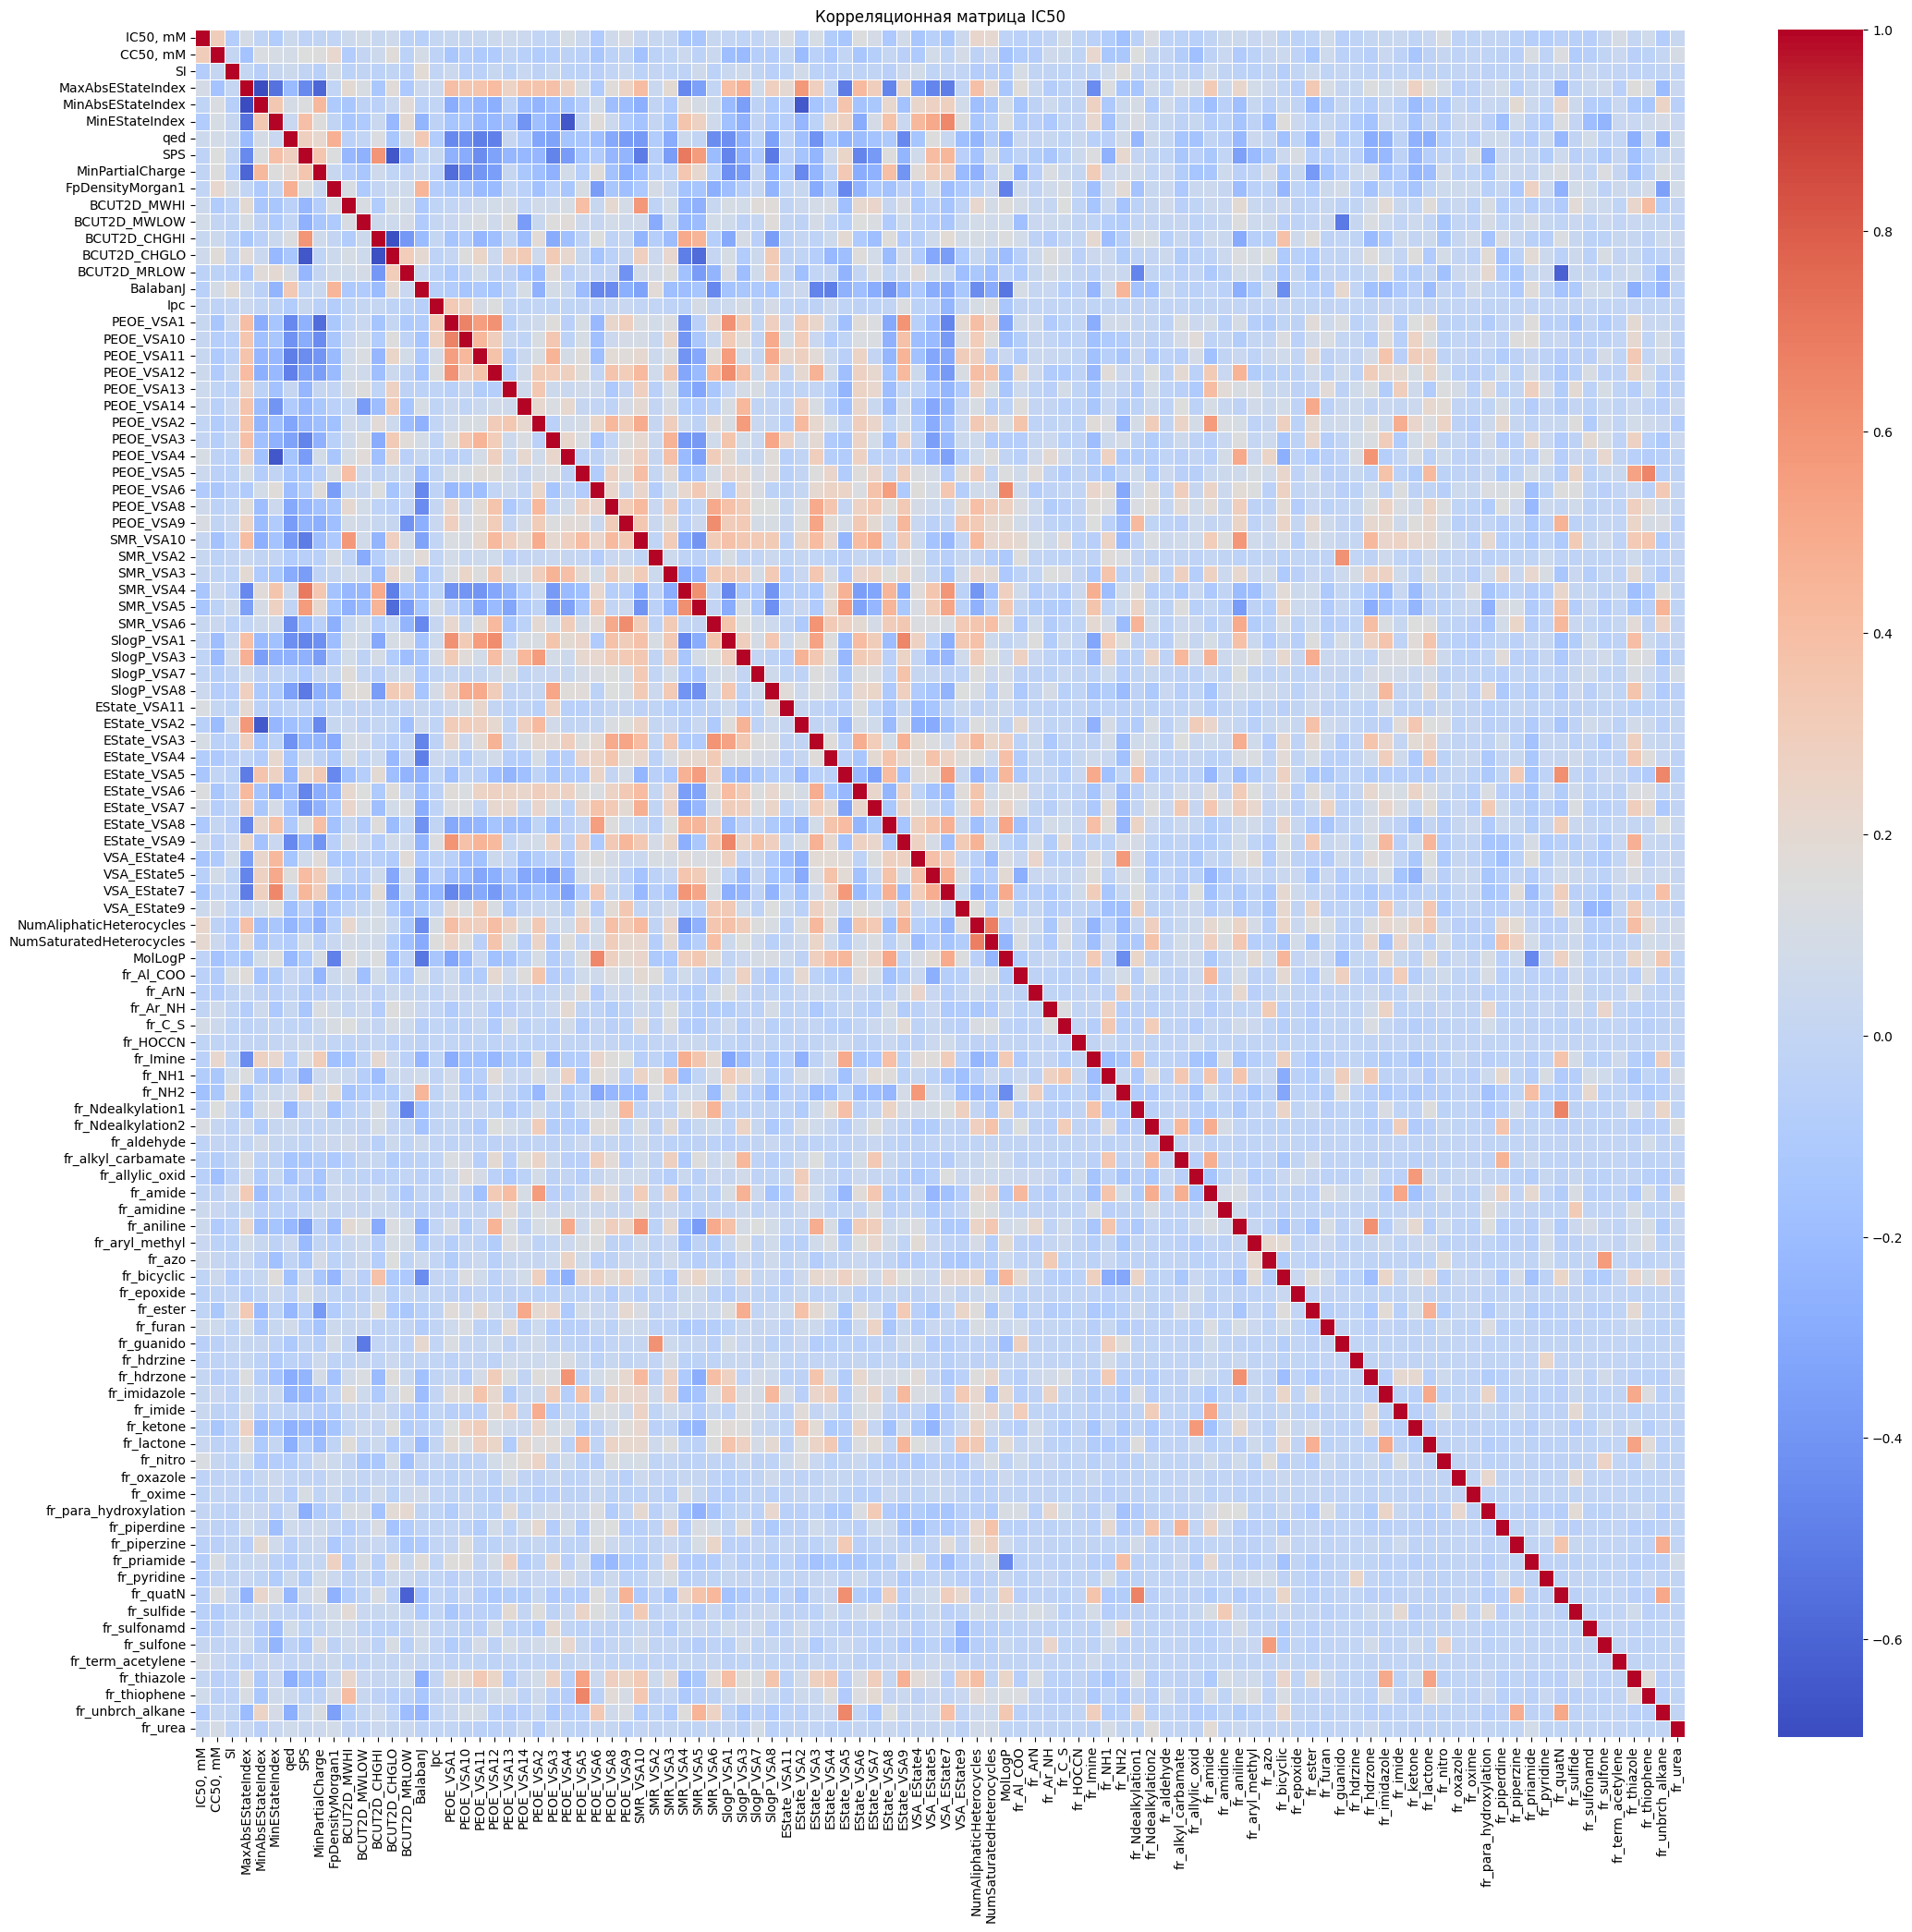

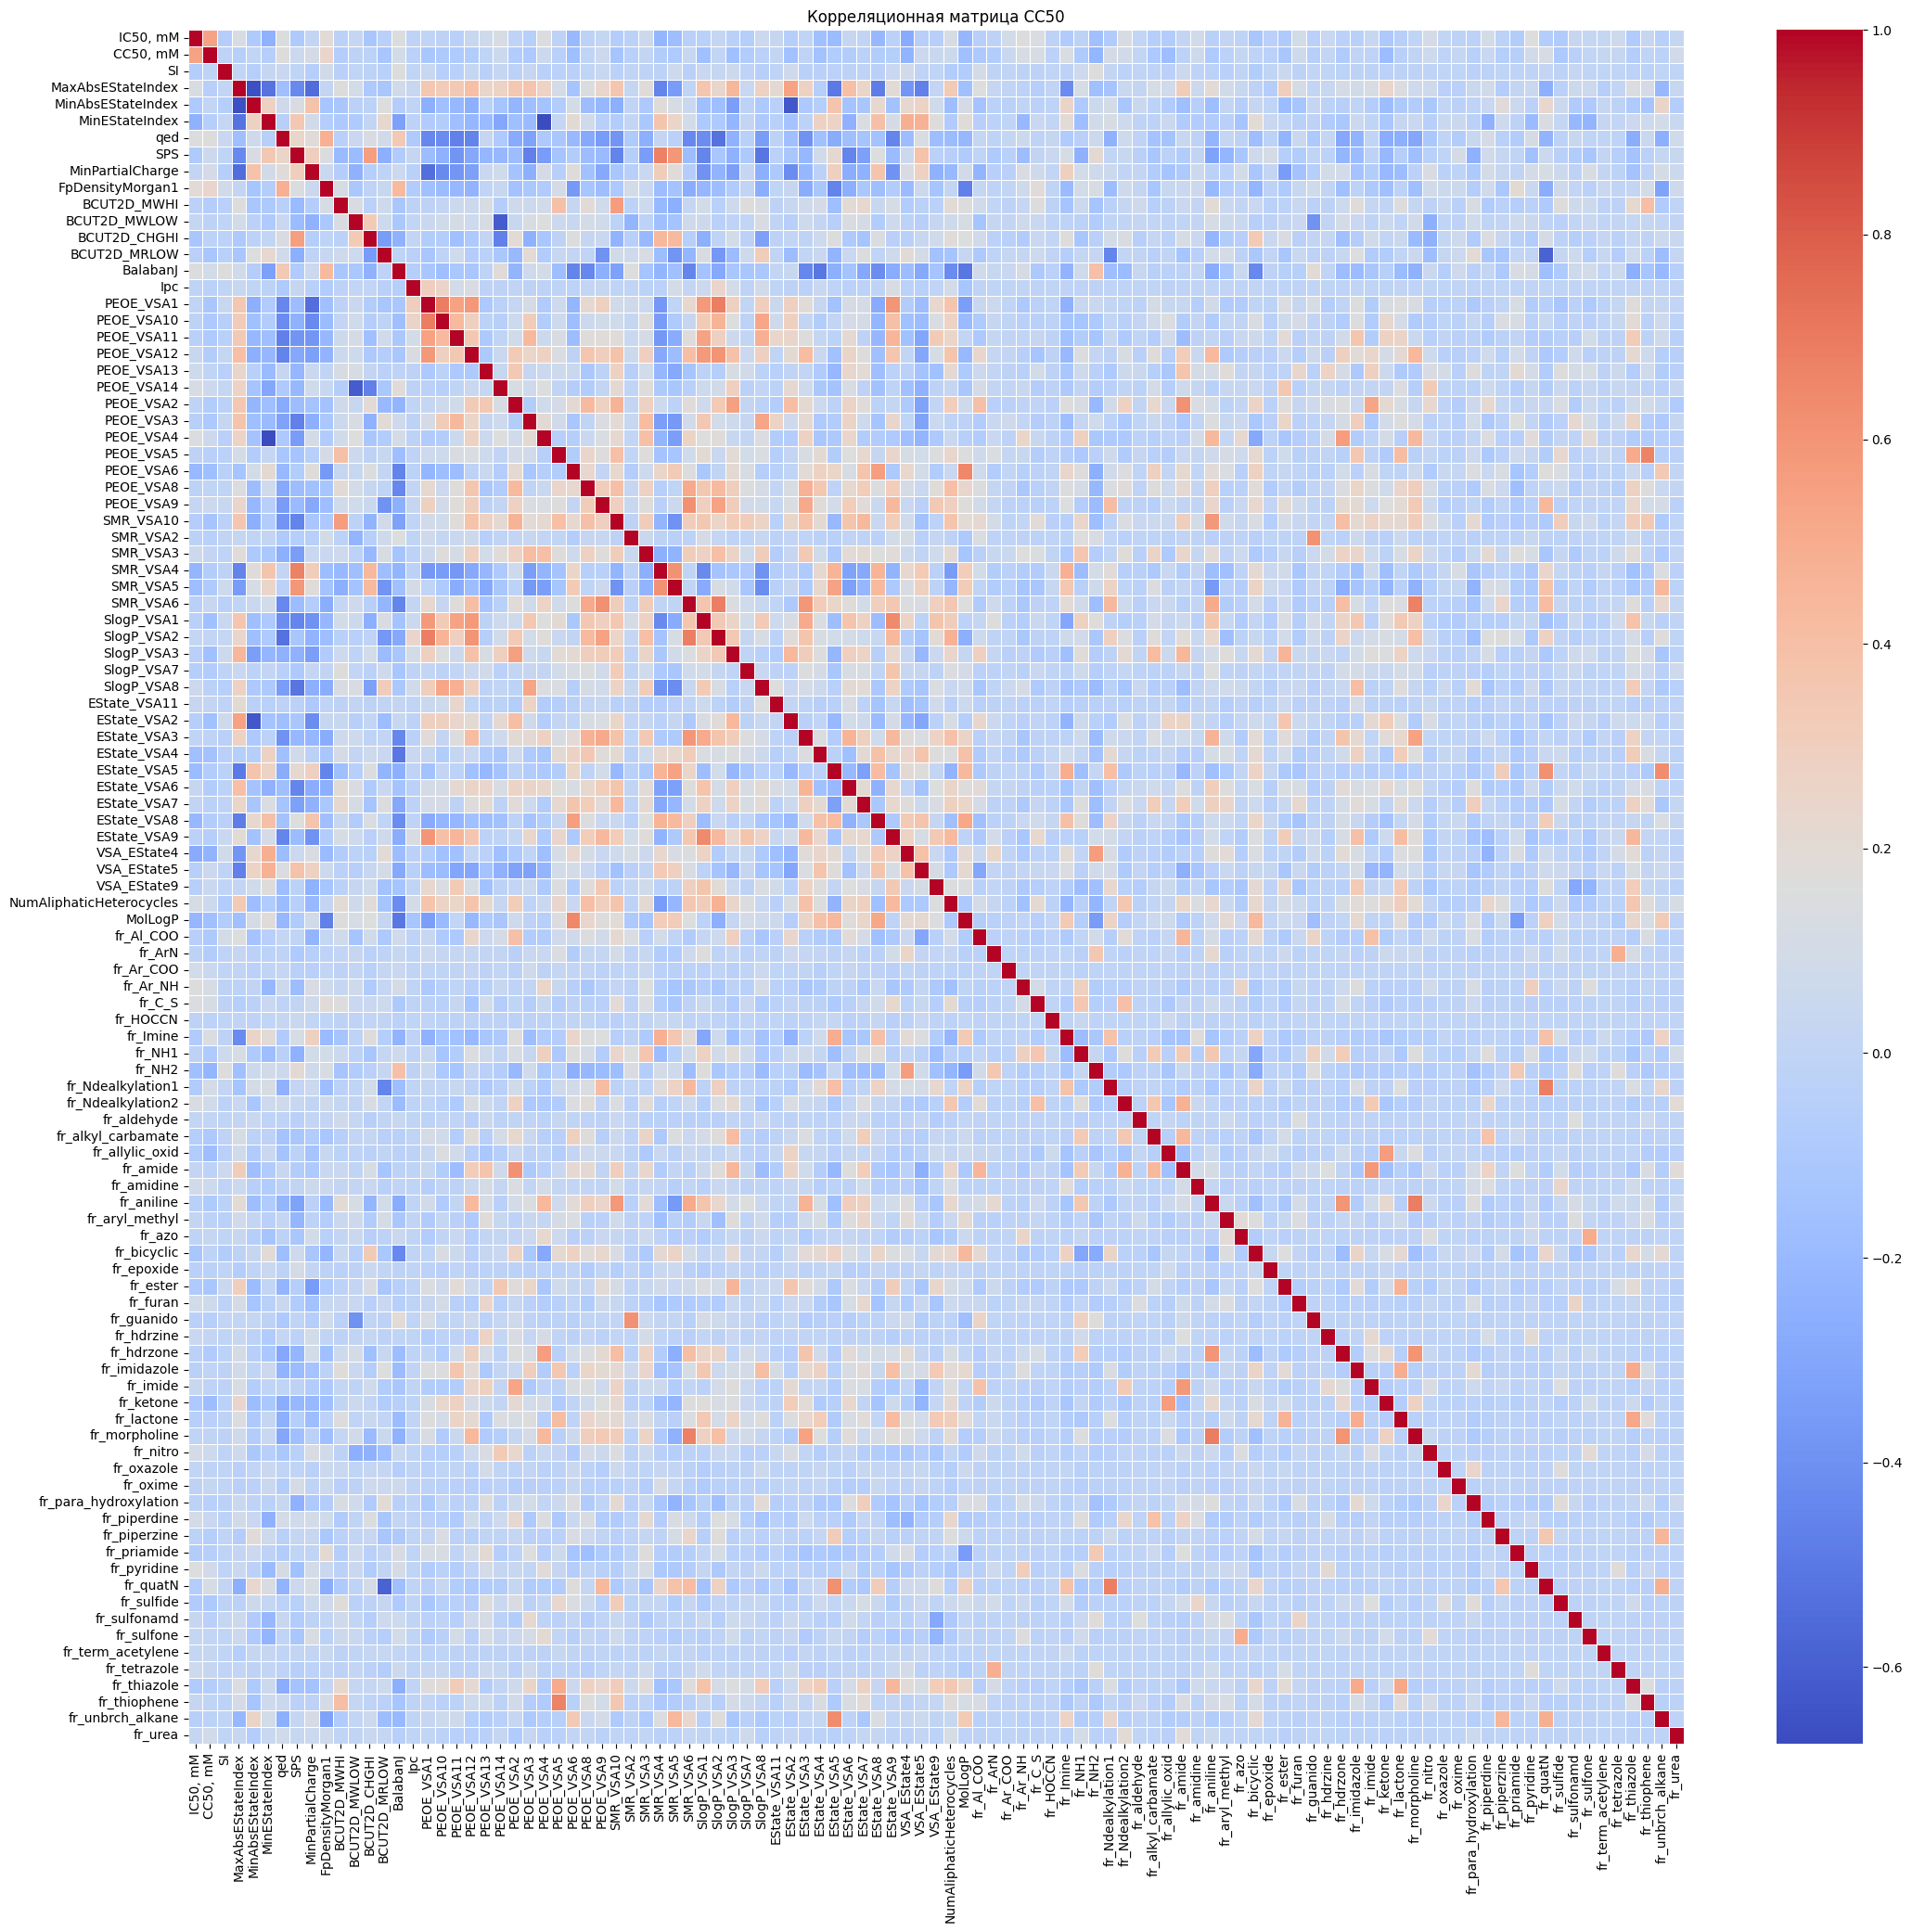

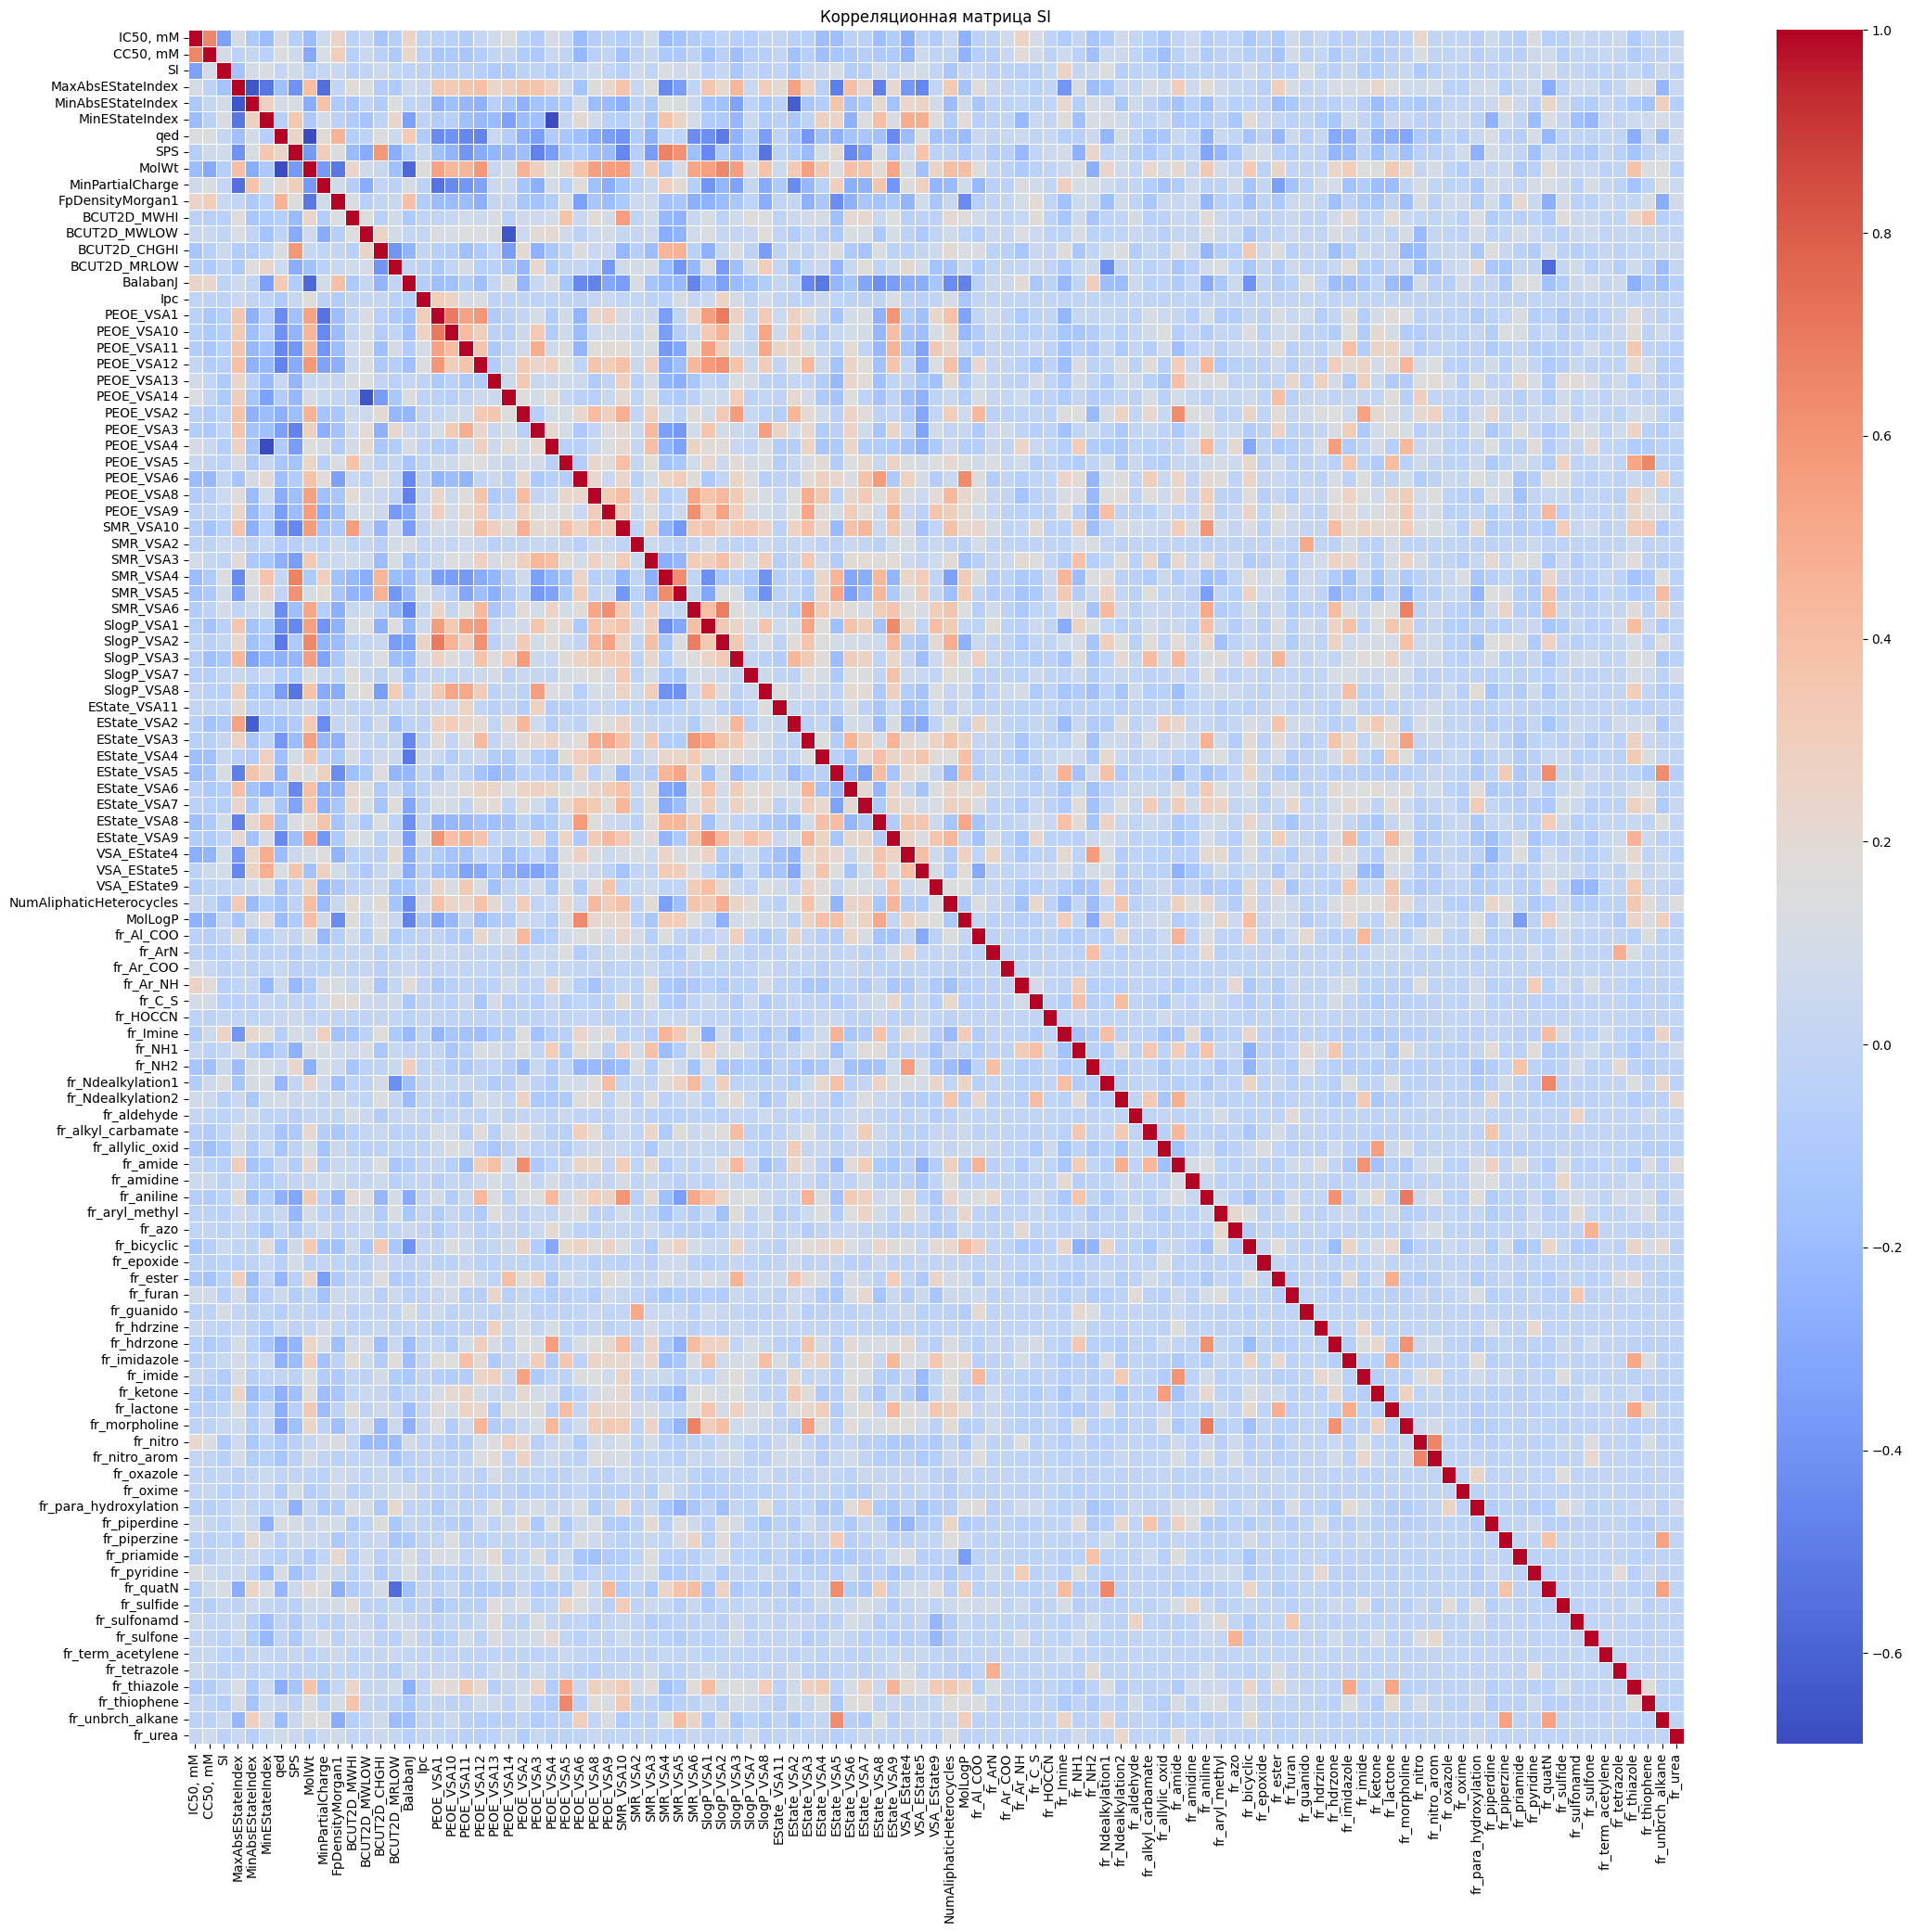

In [426]:
plt.figure(figsize=(26, 24))
sns.heatmap(corr_IC50, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица IC50')
plt.show()

plt.figure(figsize=(26, 24))
sns.heatmap(corr_CC50, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица CC50')
plt.show()

plt.figure(figsize=(26, 24))
sns.heatmap(corr_SI, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица SI')
plt.show()

# Сформируем данные для медиан и константы

Заменим целевые переменные на bool согласно критериям

In [427]:
df_IC50_median = df.drop(columns=['CC50, mM', 'SI'])
df_CC50_median = df.drop(columns=['IC50, mM', 'SI'])
df_SI_median = df.drop(columns=['CC50, mM', 'IC50, mM'])
df_SI_const = df.drop(columns=['CC50, mM', 'IC50, mM'])

In [428]:
# значения для сравнения
IC50_median = df_IC50_median['IC50, mM'].median()
CC50_median = df_CC50_median['CC50, mM'].median()
SI_median = df_SI_median['SI'].median()
const = 8

In [429]:
df_IC50_median['greater_median'] = (df_IC50_median['IC50, mM'] > IC50_median).astype(int)
df_CC50_median['greater_median'] = (df_CC50_median['CC50, mM'] > CC50_median).astype(int)
df_SI_median['greater_median'] = (df_SI_median['SI'] > SI_median).astype(int)
df_SI_const['greater_const'] = (df_SI_const['SI'] > const).astype(int)

In [430]:
df_IC50_median = df_IC50_median.drop(columns='IC50, mM')
df_CC50_median = df_CC50_median.drop(columns='CC50, mM')
df_SI_median = df_SI_median.drop(columns='SI')
df_SI_const = df_SI_const.drop(columns='SI')

In [431]:
df_IC50_median.head()

MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0           5.094096        5.094096           0.387225        0.387225   
1           3.961417        3.961417           0.533868        0.533868   
2           2.627117        2.627117           0.543231        0.543231   
3           5.097360        5.097360           0.390603        0.390603   
4           5.150510        5.150510           0.270476        0.270476   

        qed        SPS    MolWt  HeavyAtomMolWt  ExactMolWt  \
0  0.417362  42.928571  384.652         340.300  384.350449   
1  0.462473  45.214286  388.684         340.300  388.381750   
2  0.260923  42.187500  446.808         388.344  446.458903   
3  0.377846  41.862069  398.679         352.311  398.366099   
4  0.429038  36.514286  466.713         424.377  466.334799   

   NumValenceElectrons  ...  fr_sulfide  fr_sulfonamd  fr_sulfone  \
0                  158  ...           0             0           0   
1                  162  ...           0             0           0   
2                  186  ...           0             0           0   
3                  164  ...           0             0           0   
4                  184  ...           0             0           0   

   fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiophene  \
0                  0             0            0             0   
1                  0             0            0             0   
2                  0             0            0             0   
3                  0             0            0             0   
4                  0             0            0             0   

   fr_unbrch_alkane  fr_urea  greater_median  
0                 3        0               0  
1                 3        0               0  
2                 3        0               1  
3                 4        0               0  
4                 0        0               1  

[5 rows x 193 columns]

## Посмотрим на корреляционные матрицы для целевых переменных:

In [432]:
IC50_median_corr = df_IC50_median.corr()
CC50_median_corr = df_CC50_median.corr()
SI_median_corr = df_SI_median.corr()
SI_const_corr = df_SI_const.corr()

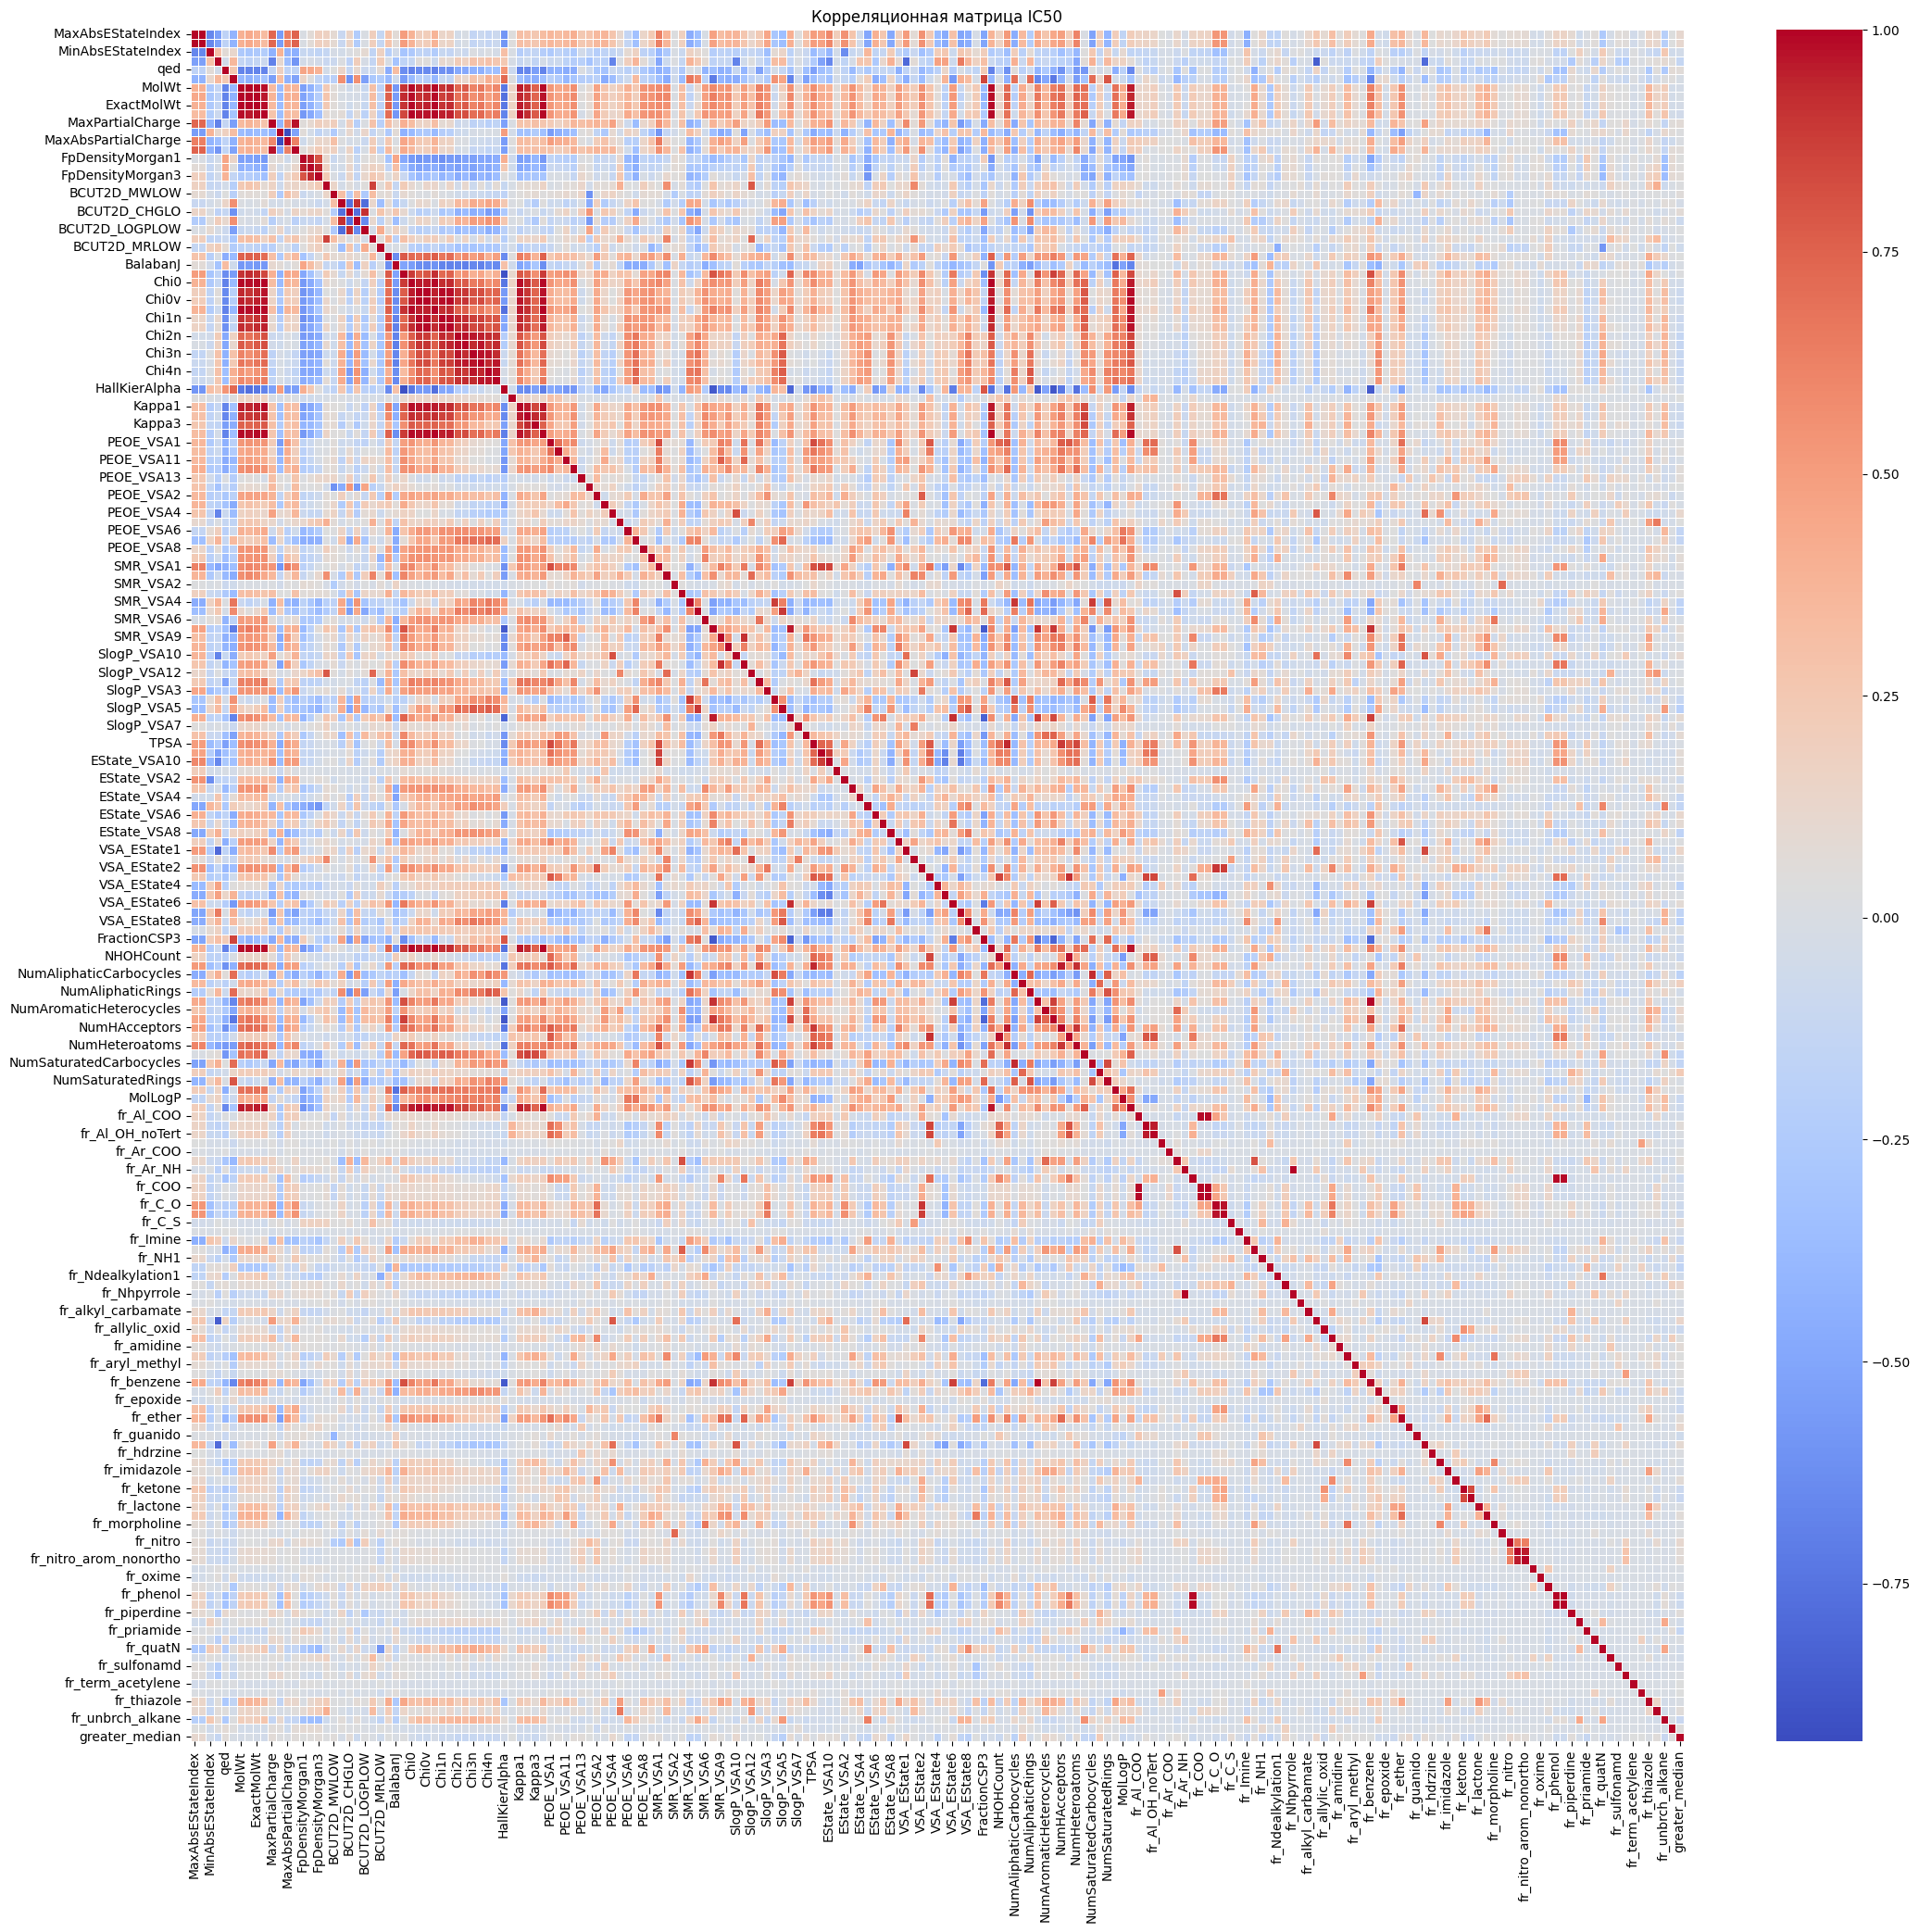

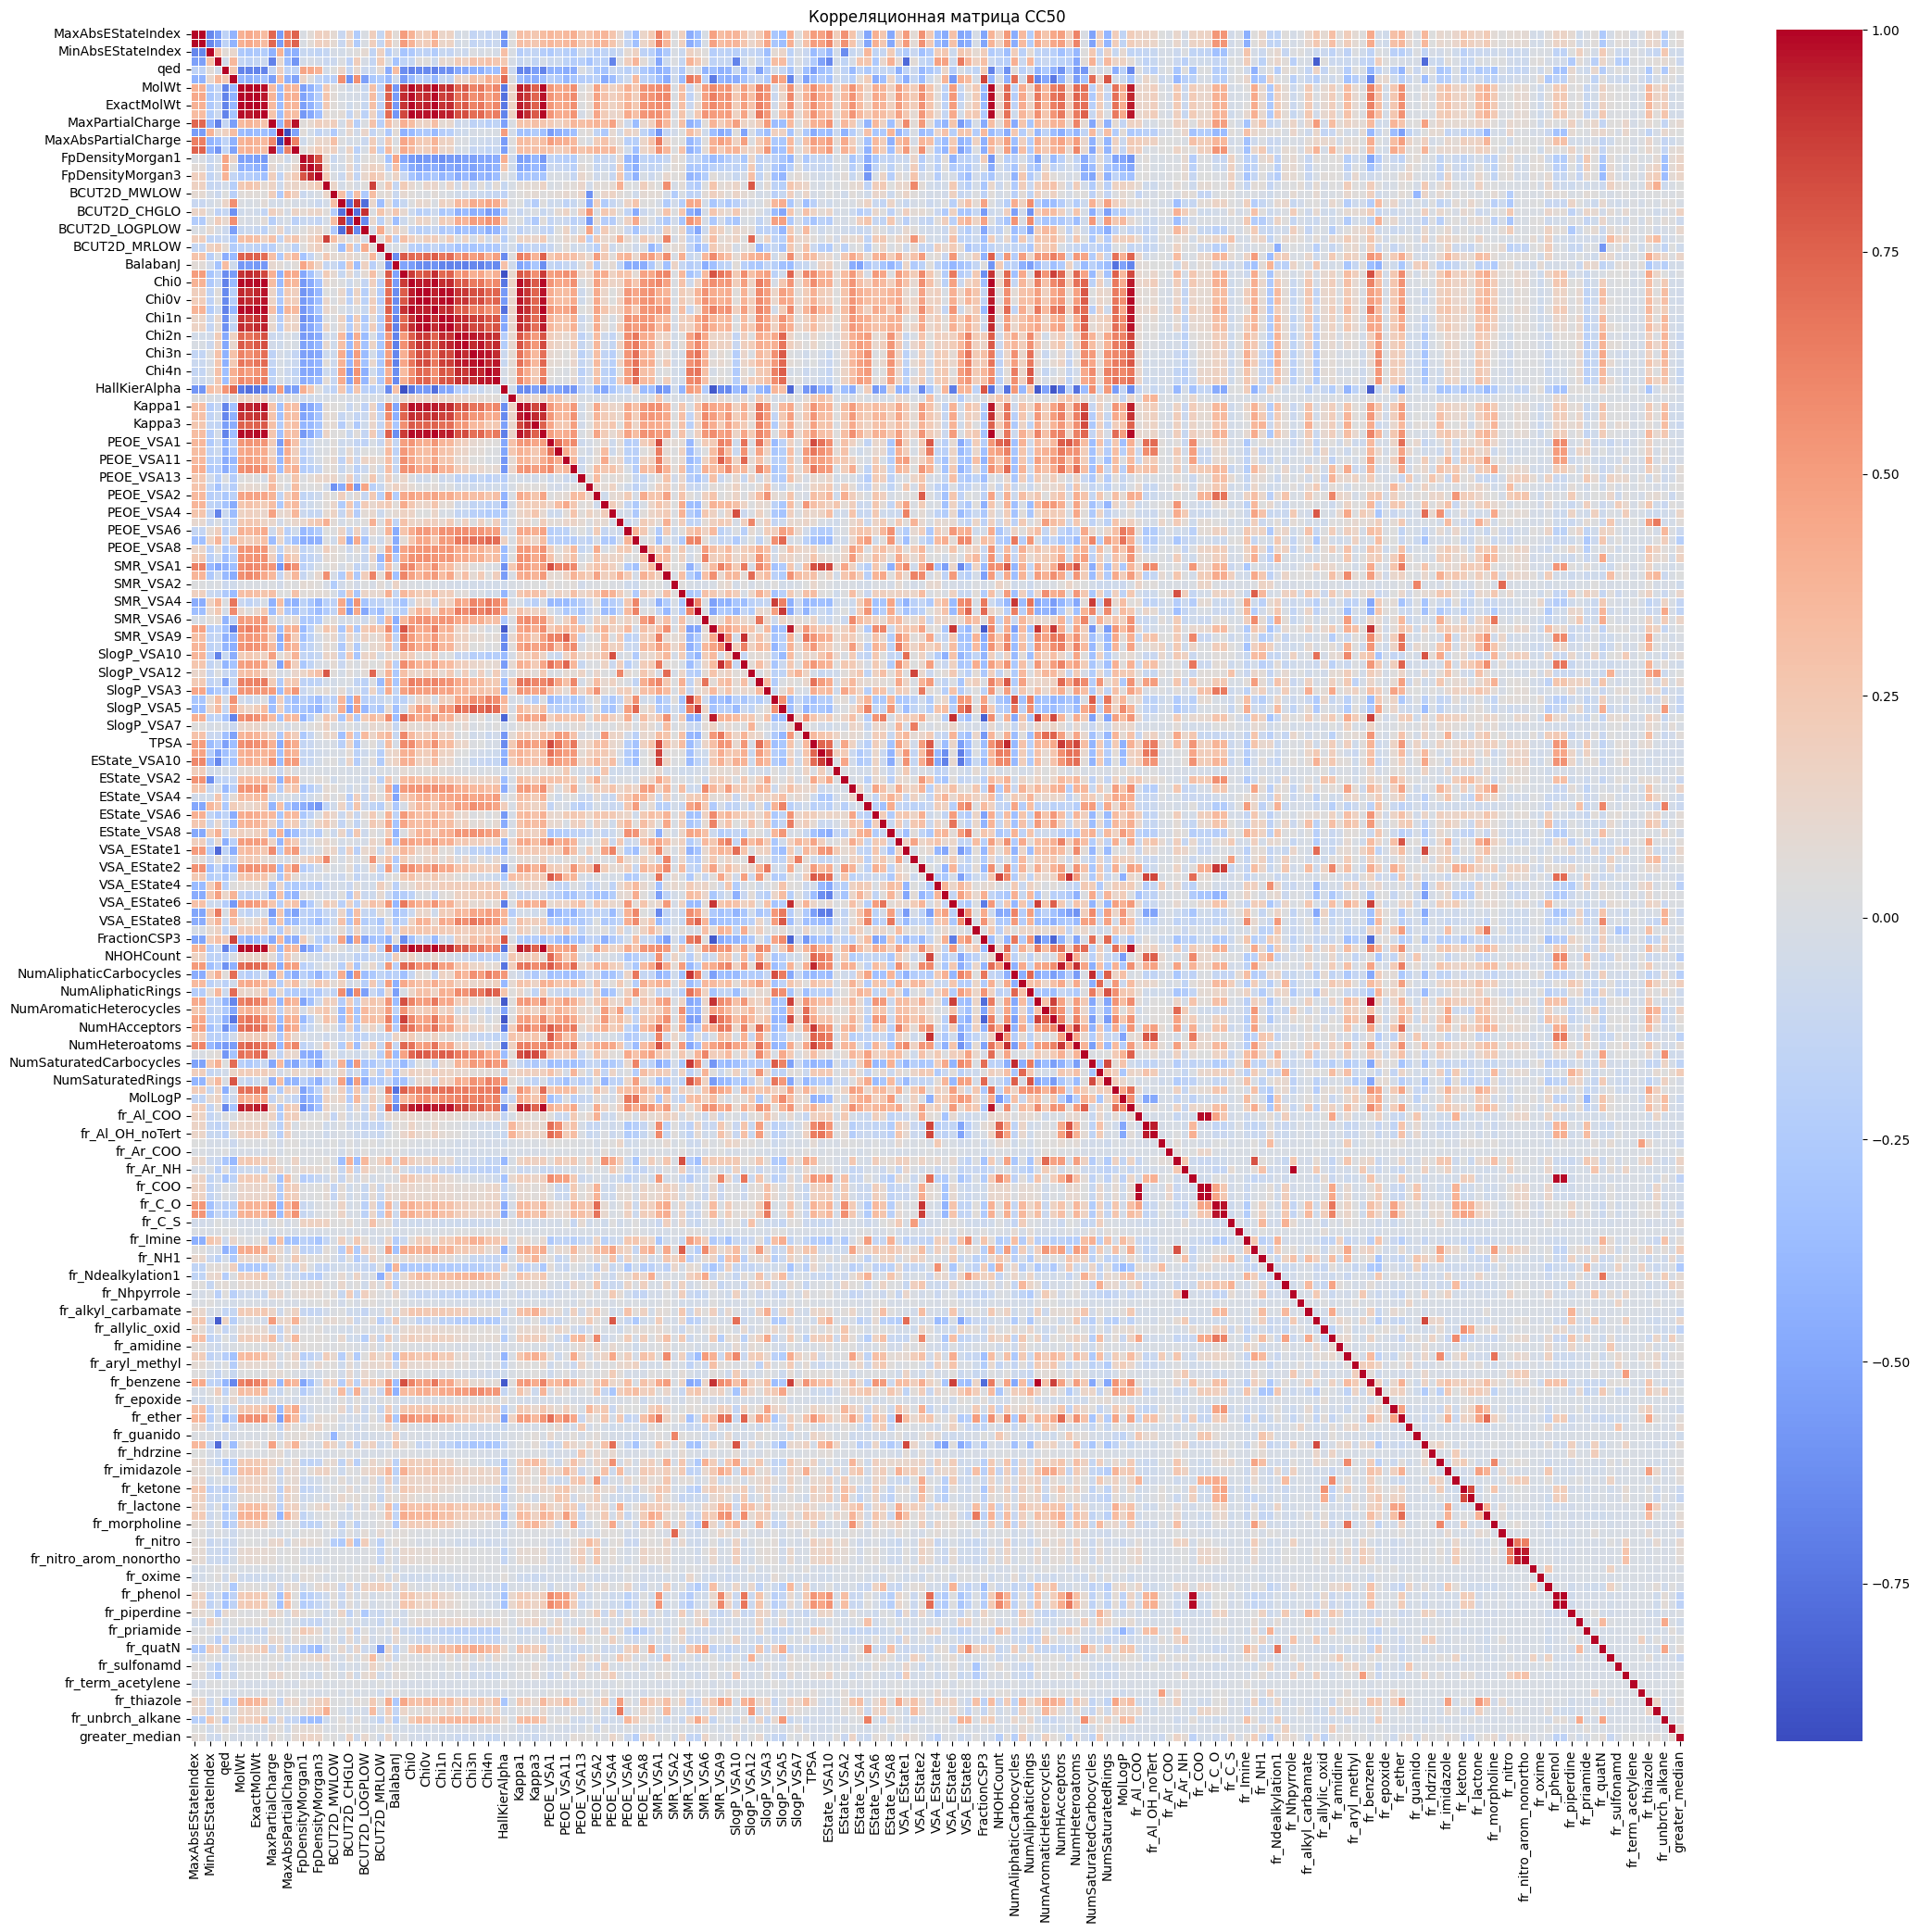

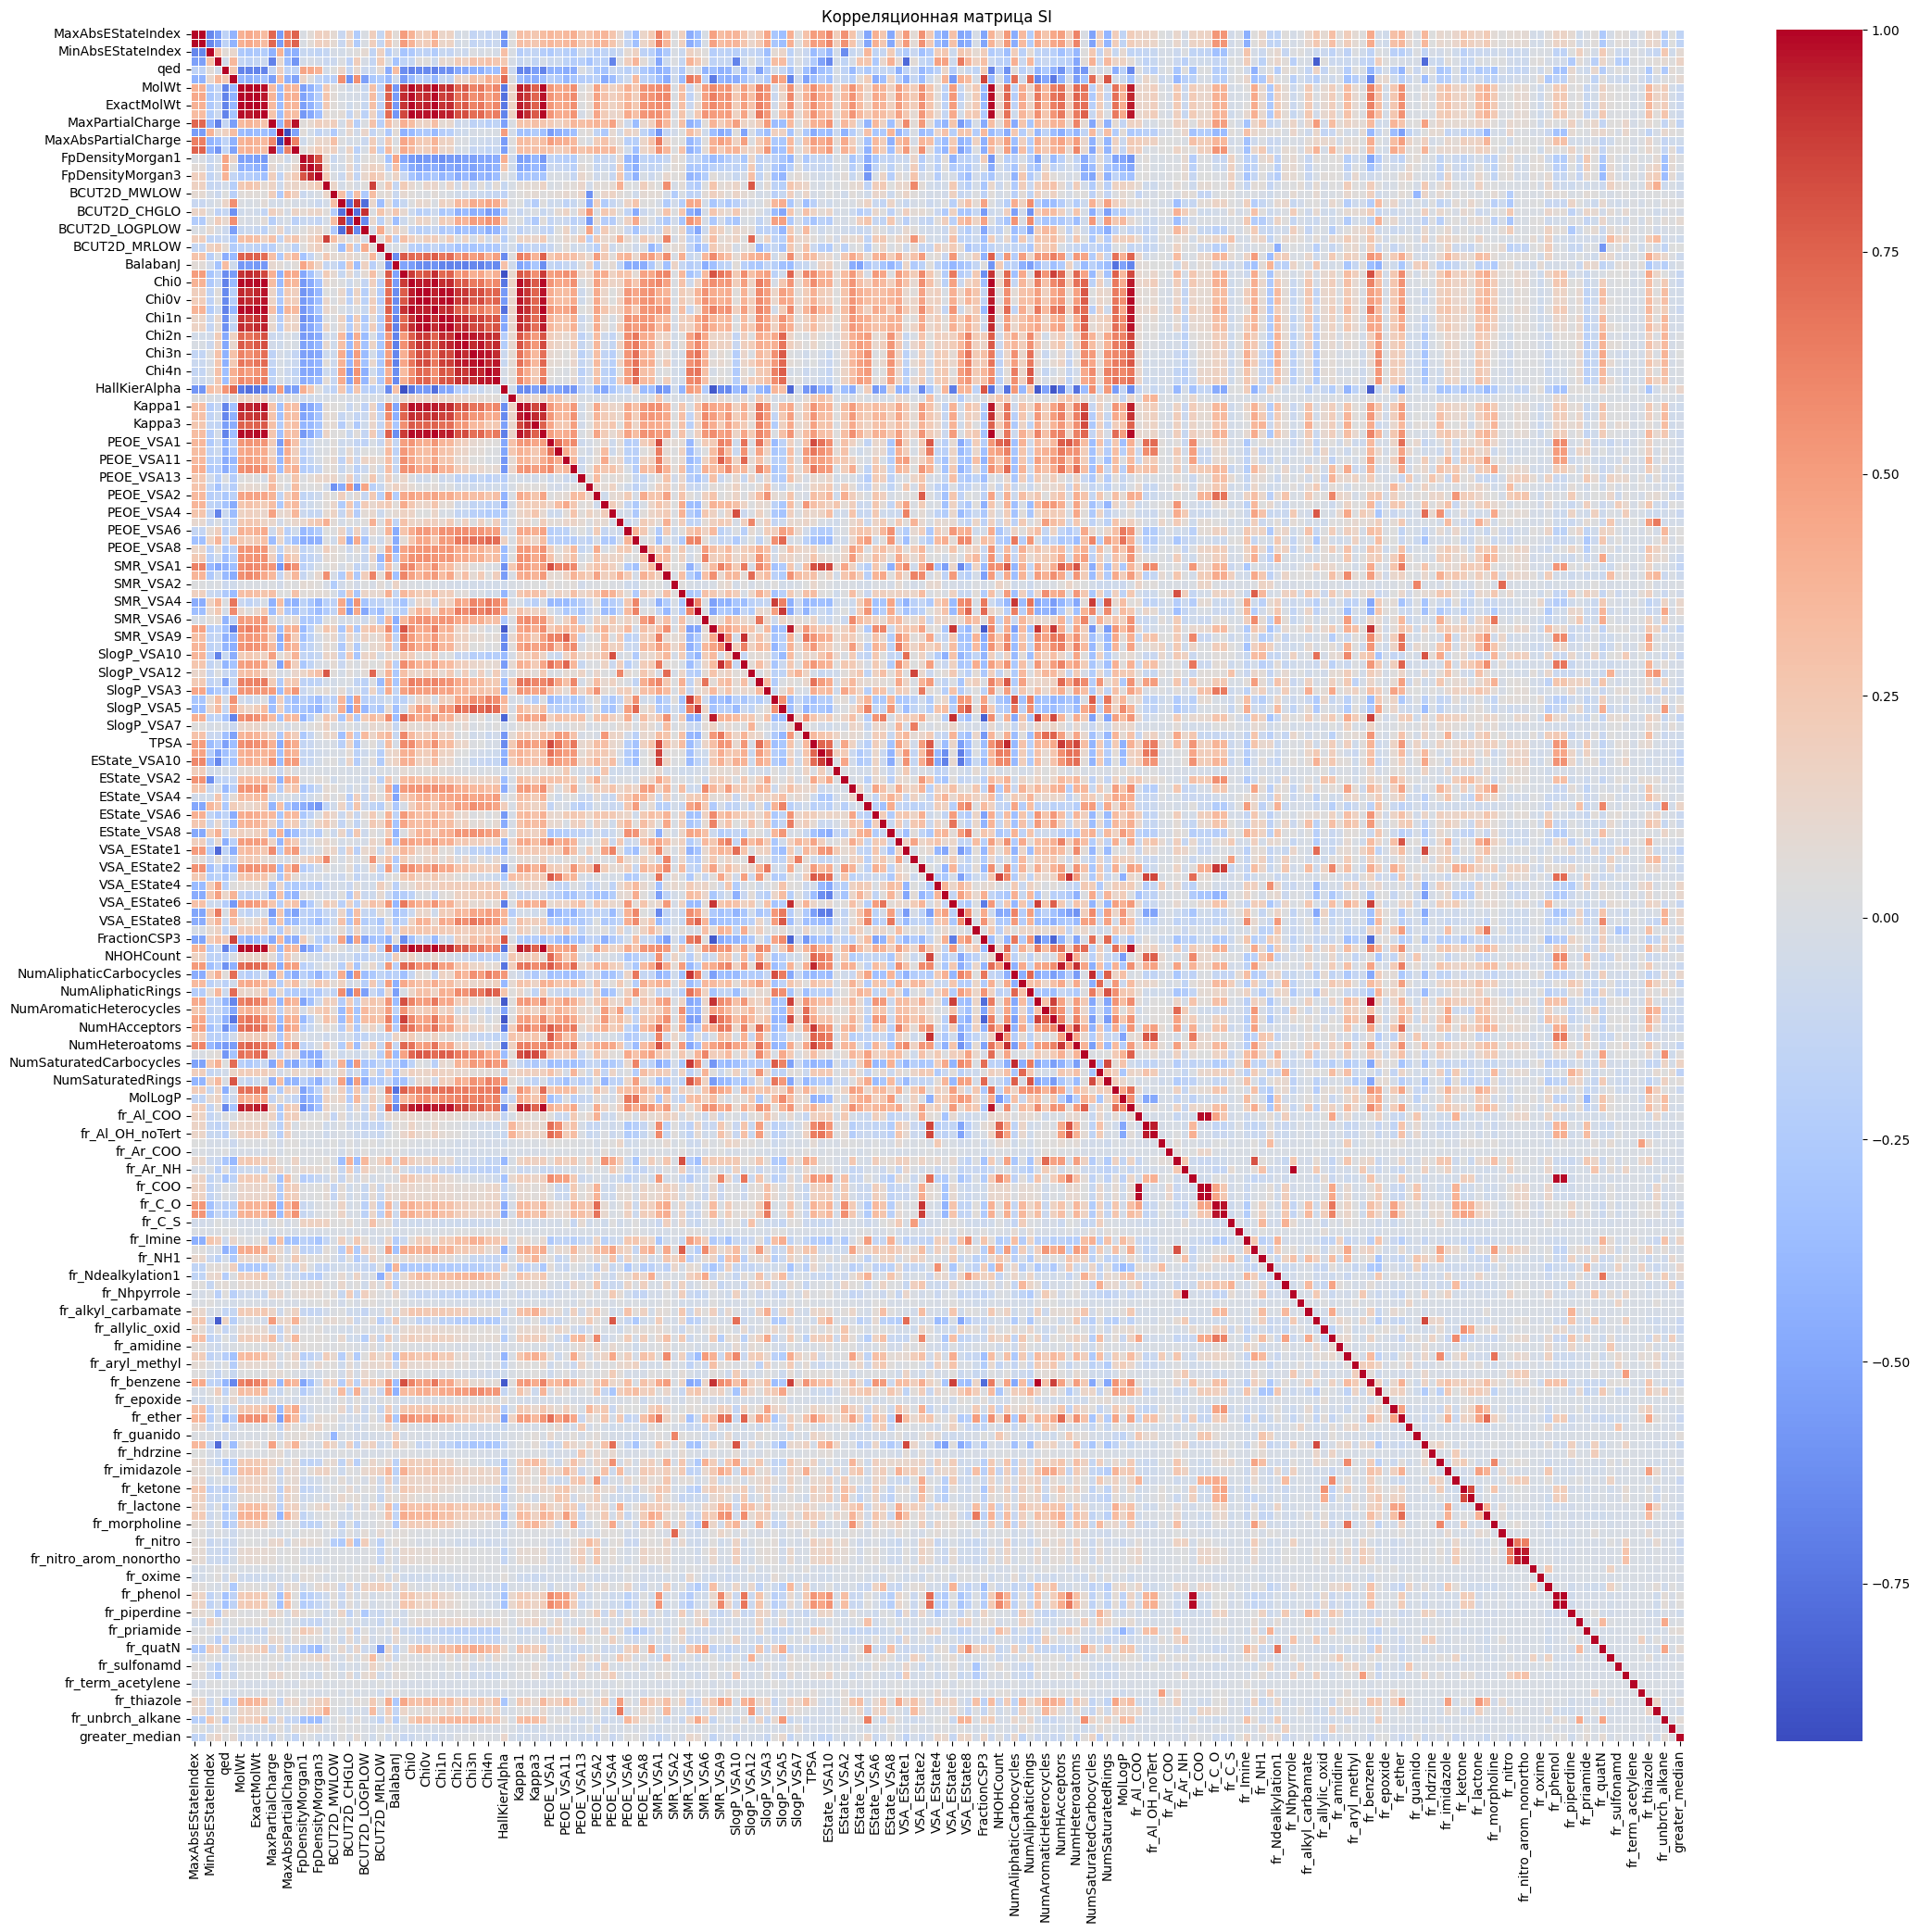

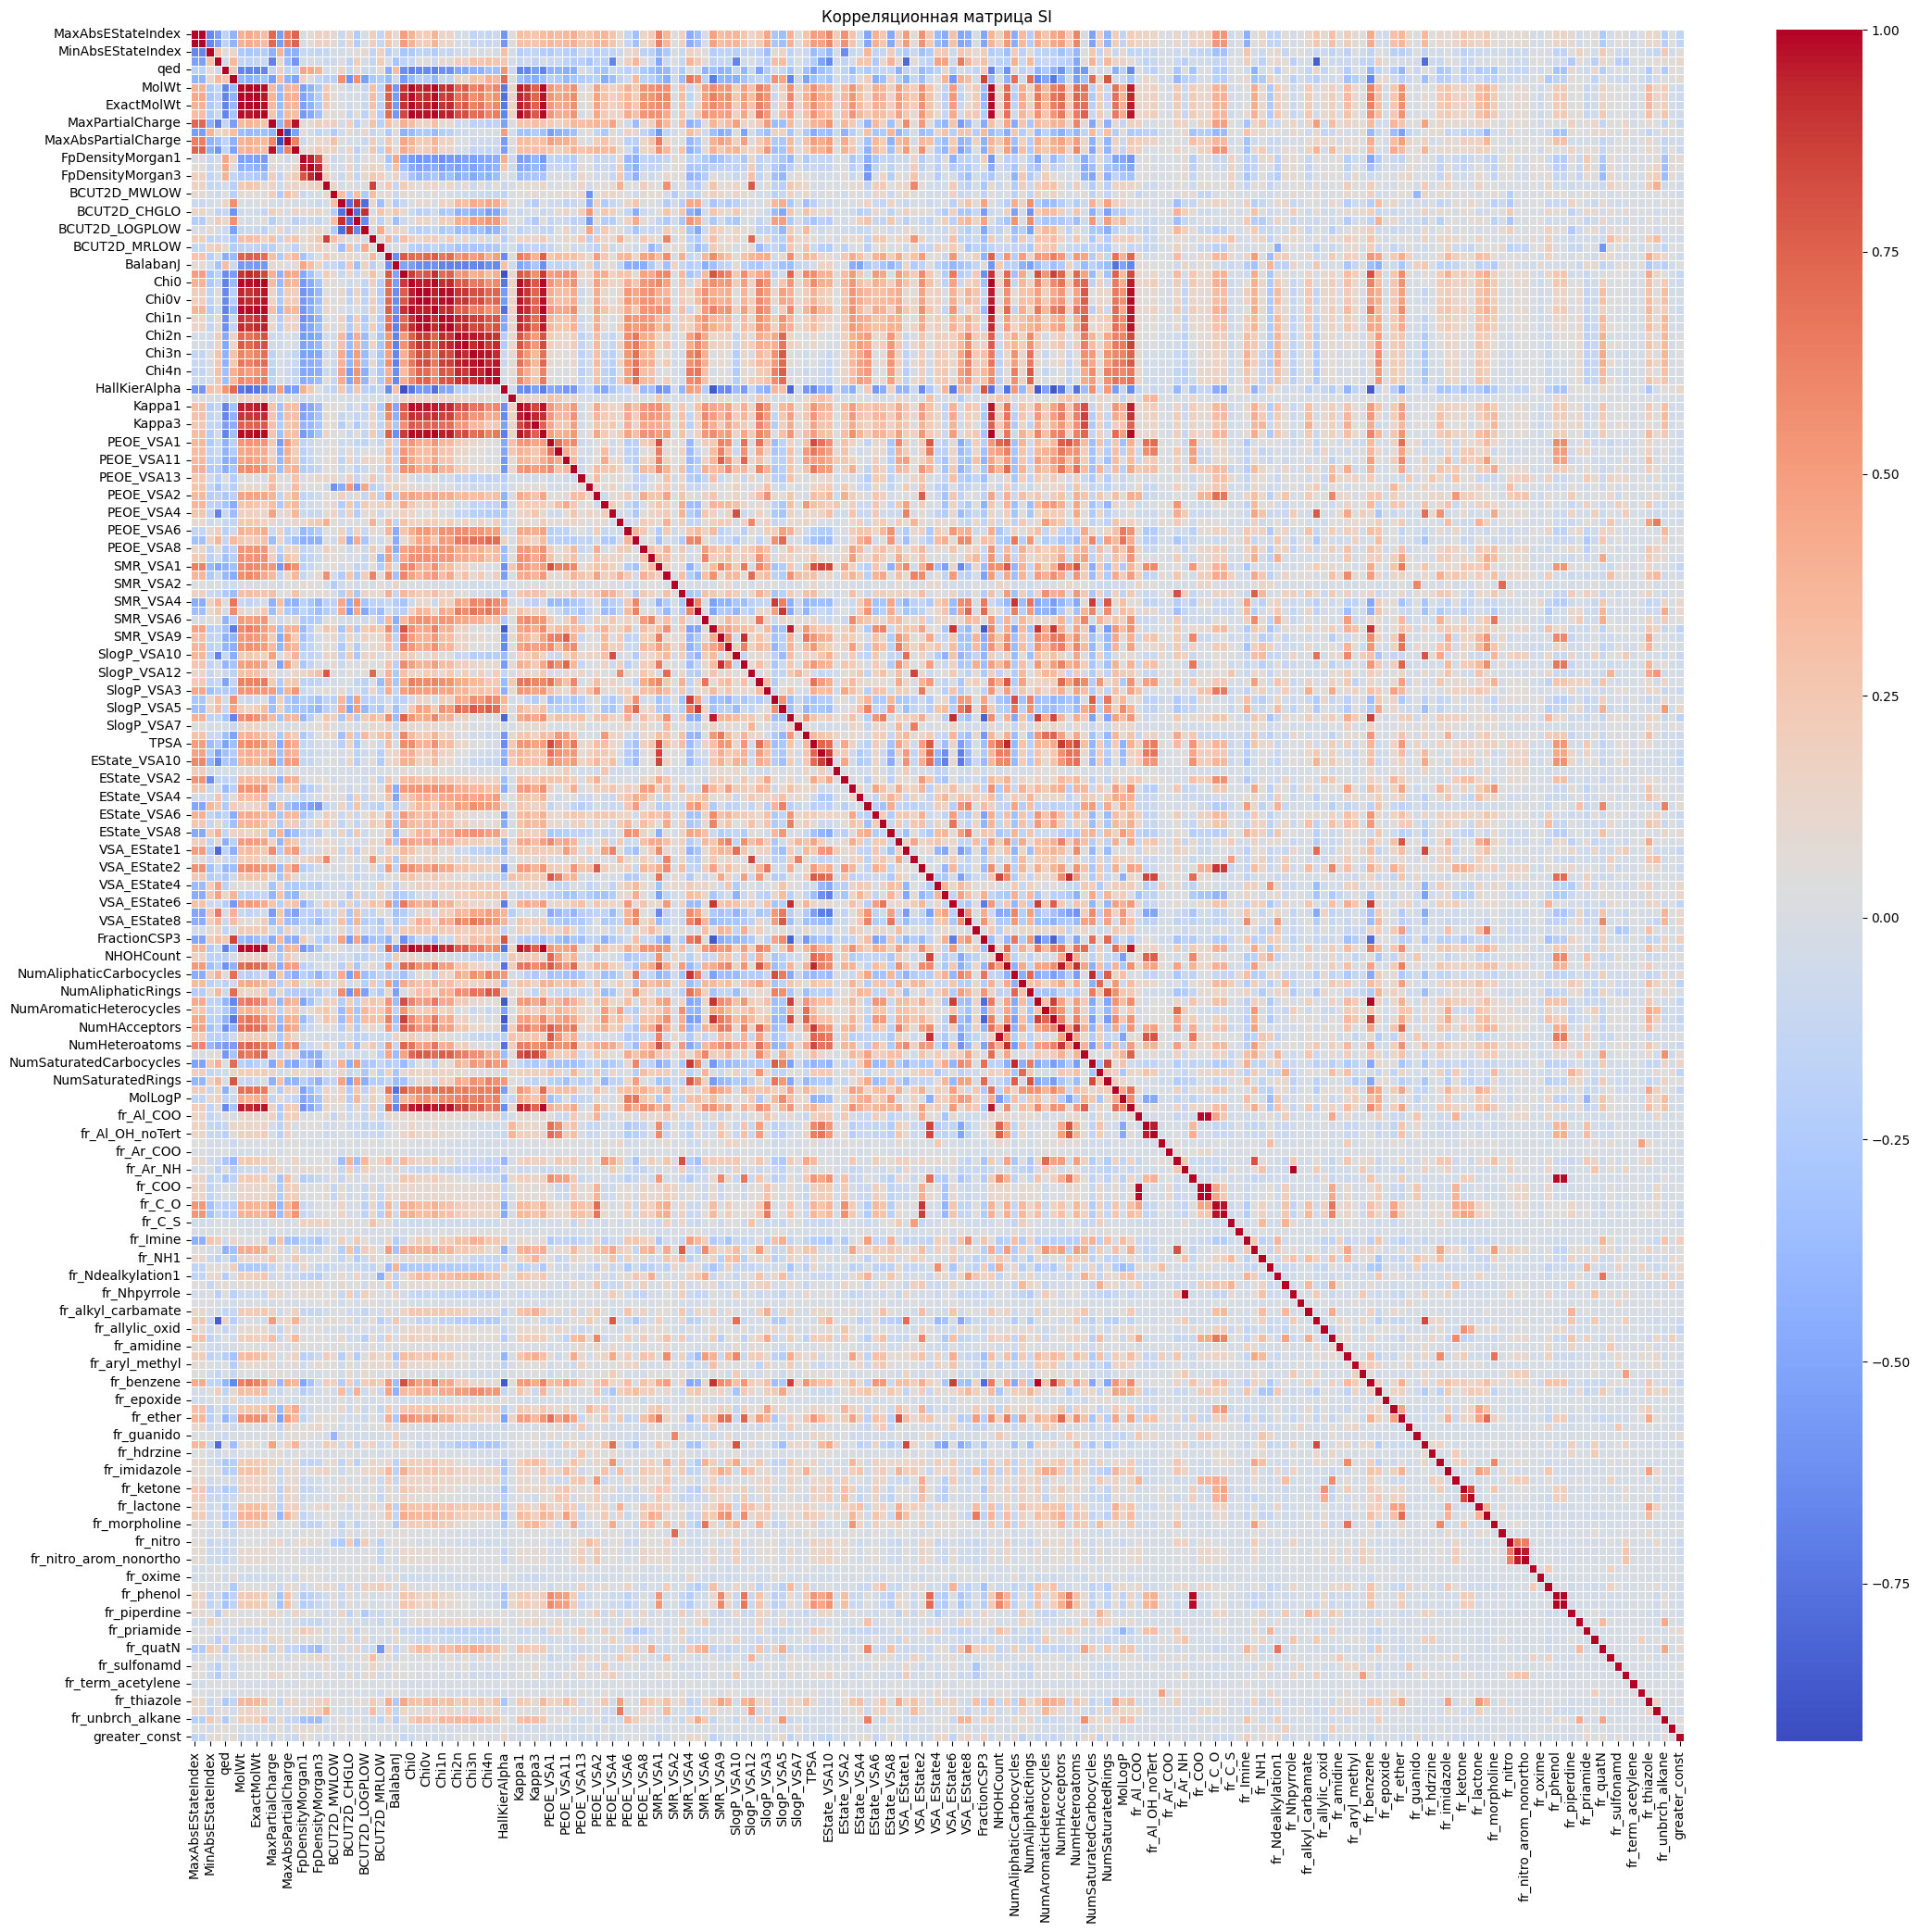

In [433]:
plt.figure(figsize=(26, 24))
sns.heatmap(IC50_median_corr, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица IC50')
plt.show()

plt.figure(figsize=(26, 24))
sns.heatmap(CC50_median_corr, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица CC50')
plt.show()

plt.figure(figsize=(26, 24))
sns.heatmap(SI_median_corr, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица SI')
plt.show()

plt.figure(figsize=(26, 24))
sns.heatmap(SI_const_corr, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица SI')
plt.show()

Посмотрим на значения коэффициентов с целевыми переменными:

In [434]:
print(IC50_median_corr['greater_median'].sort_values(ascending=False), end='\n\n')
print(CC50_median_corr['greater_median'].sort_values(ascending=False), end='\n\n')
print(SI_median_corr['greater_median'].sort_values(ascending=False), end='\n\n')
print(SI_const_corr['greater_const'].sort_values(ascending=False))

greater_median              1.000000
NumSaturatedHeterocycles    0.231725
NumAliphaticHeterocycles    0.192135
VSA_EState1                 0.140840
fr_Ndealkylation2           0.130338
                              ...   
EState_VSA8                -0.164051
VSA_EState4                -0.177012
NumAliphaticCarbocycles    -0.179115
VSA_EState8                -0.189516
SlogP_VSA5                 -0.202180
Name: greater_median, Length: 193, dtype: float64

greater_median              1.000000
NumSaturatedHeterocycles    0.223004
fr_NH0                      0.213581
NumAliphaticHeterocycles    0.197638
NumAromaticHeterocycles     0.179882
                              ...   
VSA_EState4                -0.190909
PEOE_VSA7                  -0.208995
NumAliphaticCarbocycles    -0.209026
NHOHCount                  -0.219937
fr_NH2                     -0.266451
Name: greater_median, Length: 193, dtype: float64

greater_median              1.000000
FractionCSP3                0.161325
NumSaturat

Значения NaN отсутствуют

Удалим сильно коррелирующие между собой столбцы:

In [435]:
df_IC50_median_clear = remove_high_corr(df_IC50_median)
df_CC50_median_clear = remove_high_corr(df_CC50_median)
df_SI_median_clear = remove_high_corr(df_SI_median)
df_SI_const_clear = remove_high_corr(df_SI_const)

Посмотрим на обновленные матрицы:

In [436]:
df_IC50_median_corr = df_IC50_median_clear.corr()
df_CC50_median_corr = df_CC50_median_clear.corr()
df_SI_median_corr = df_SI_median_clear.corr()
df_SI_const_corr = df_SI_const_clear.corr()

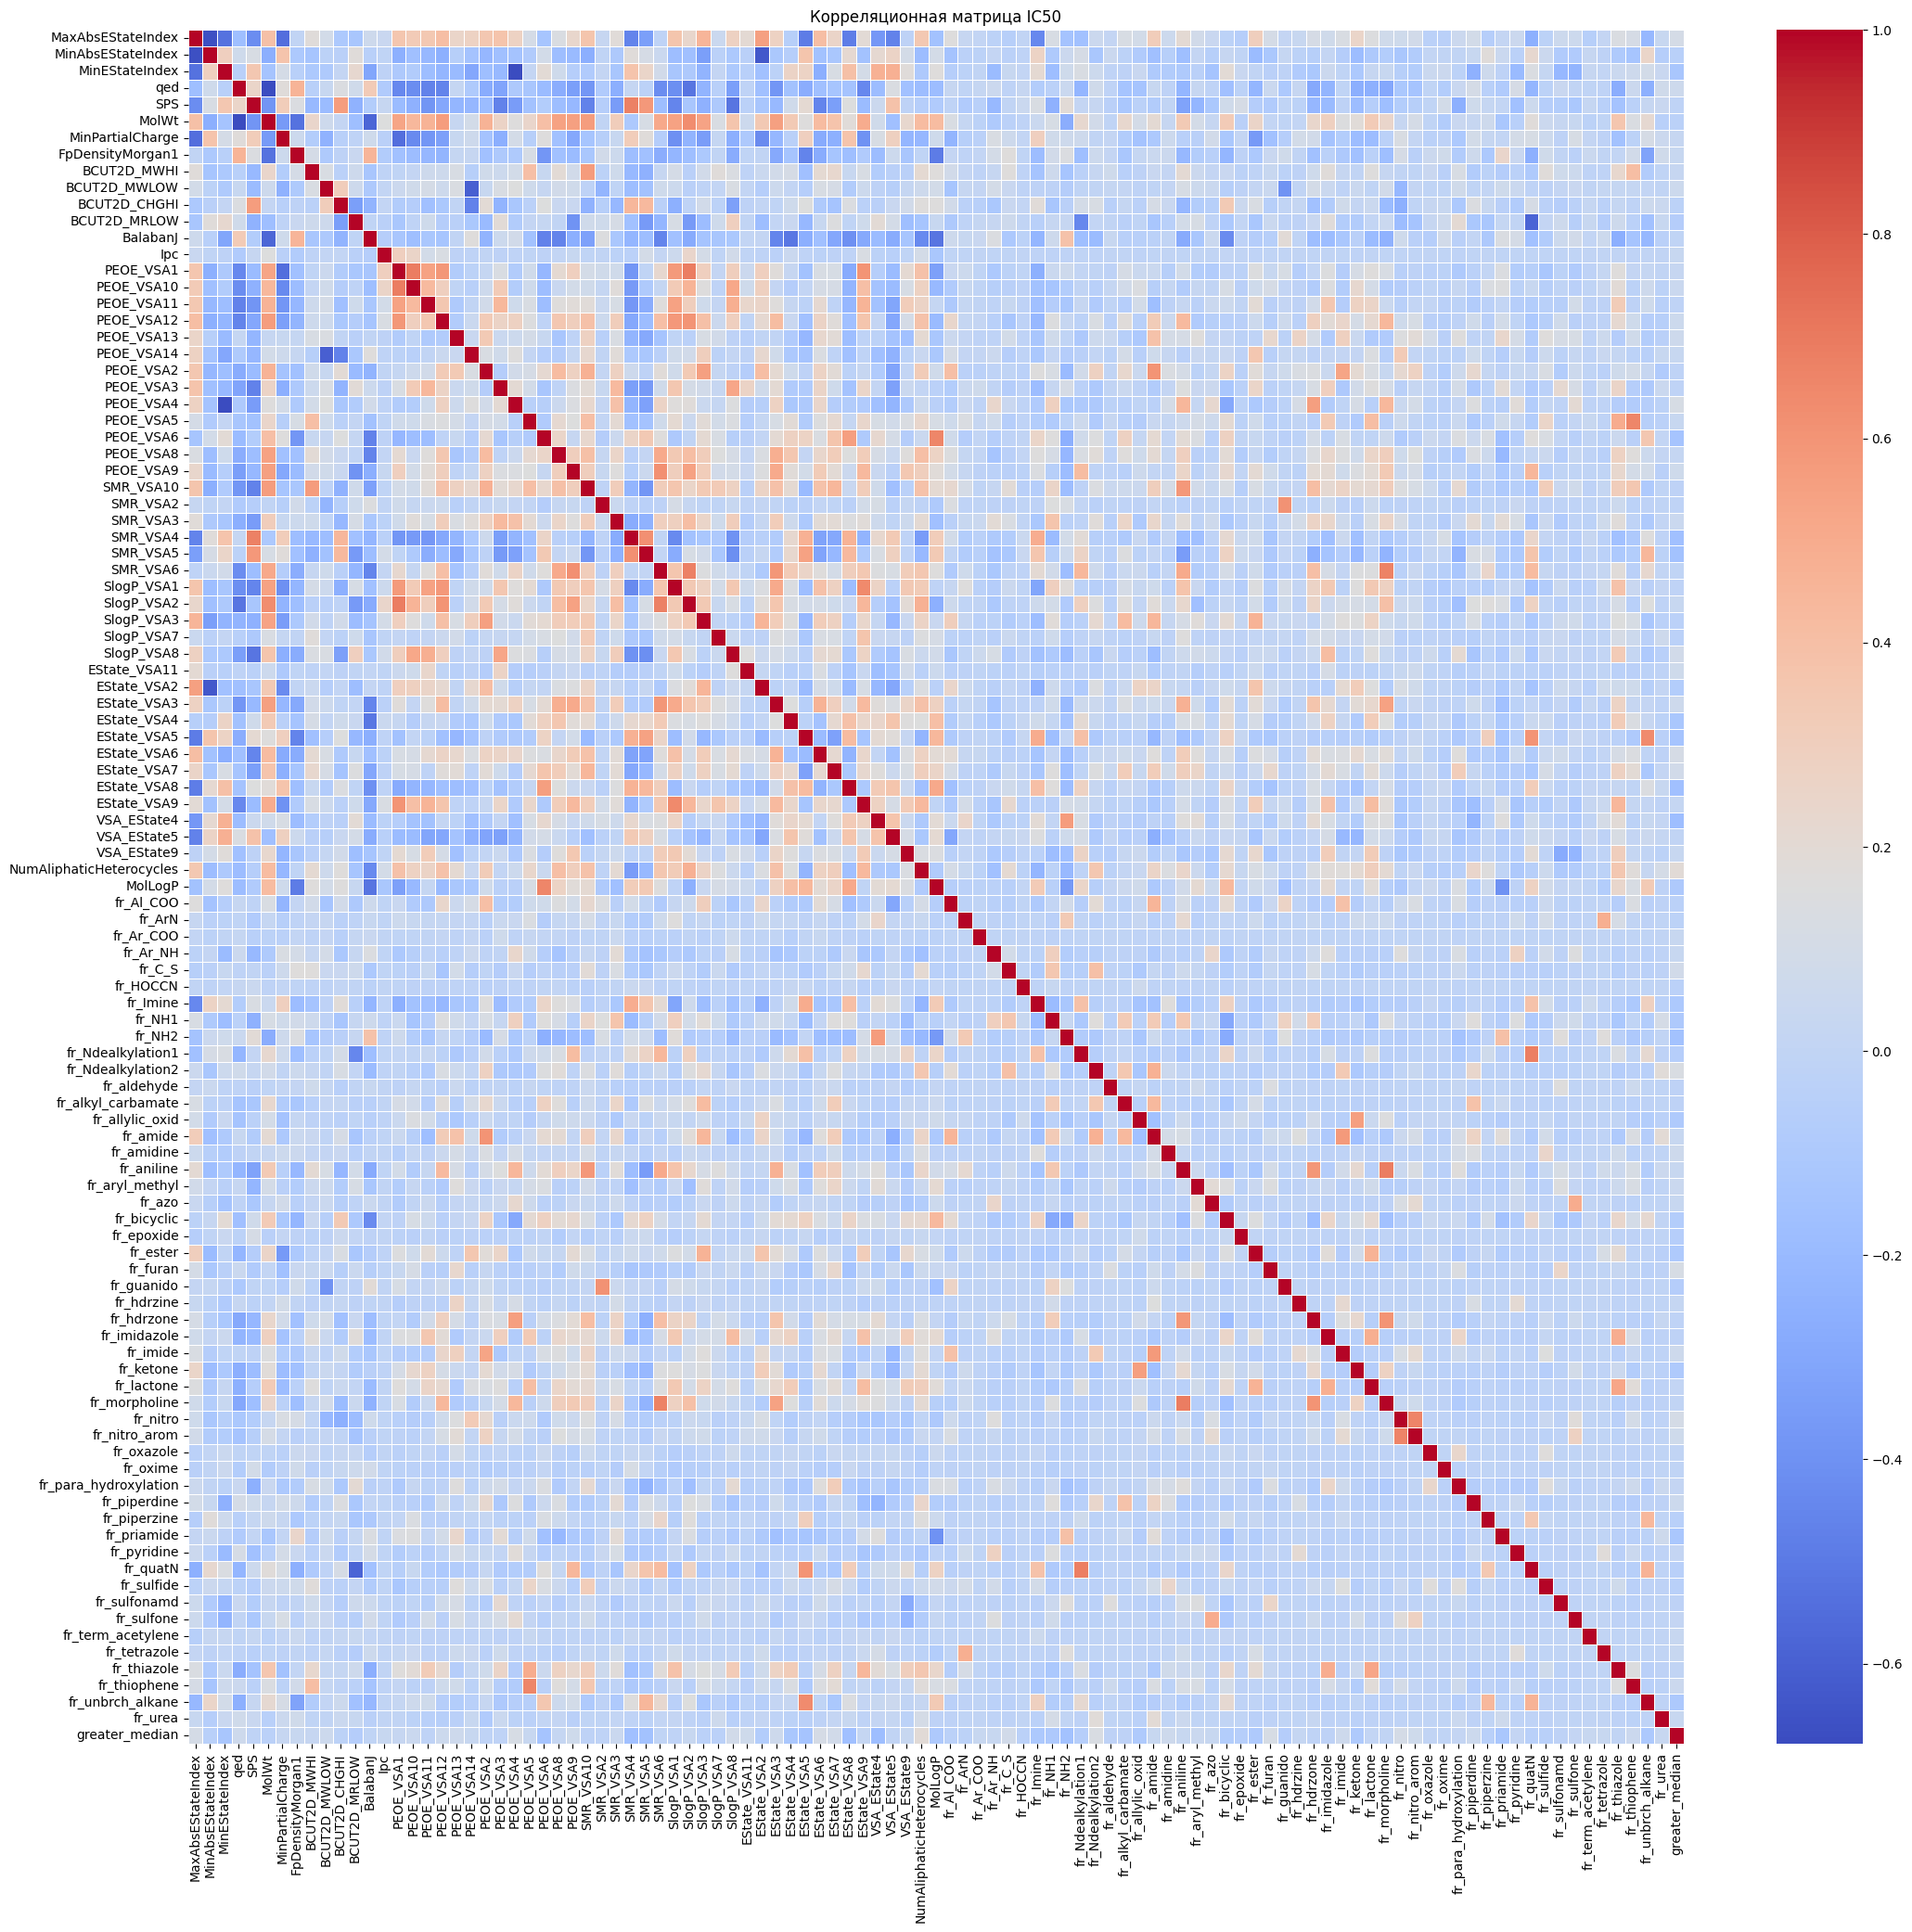

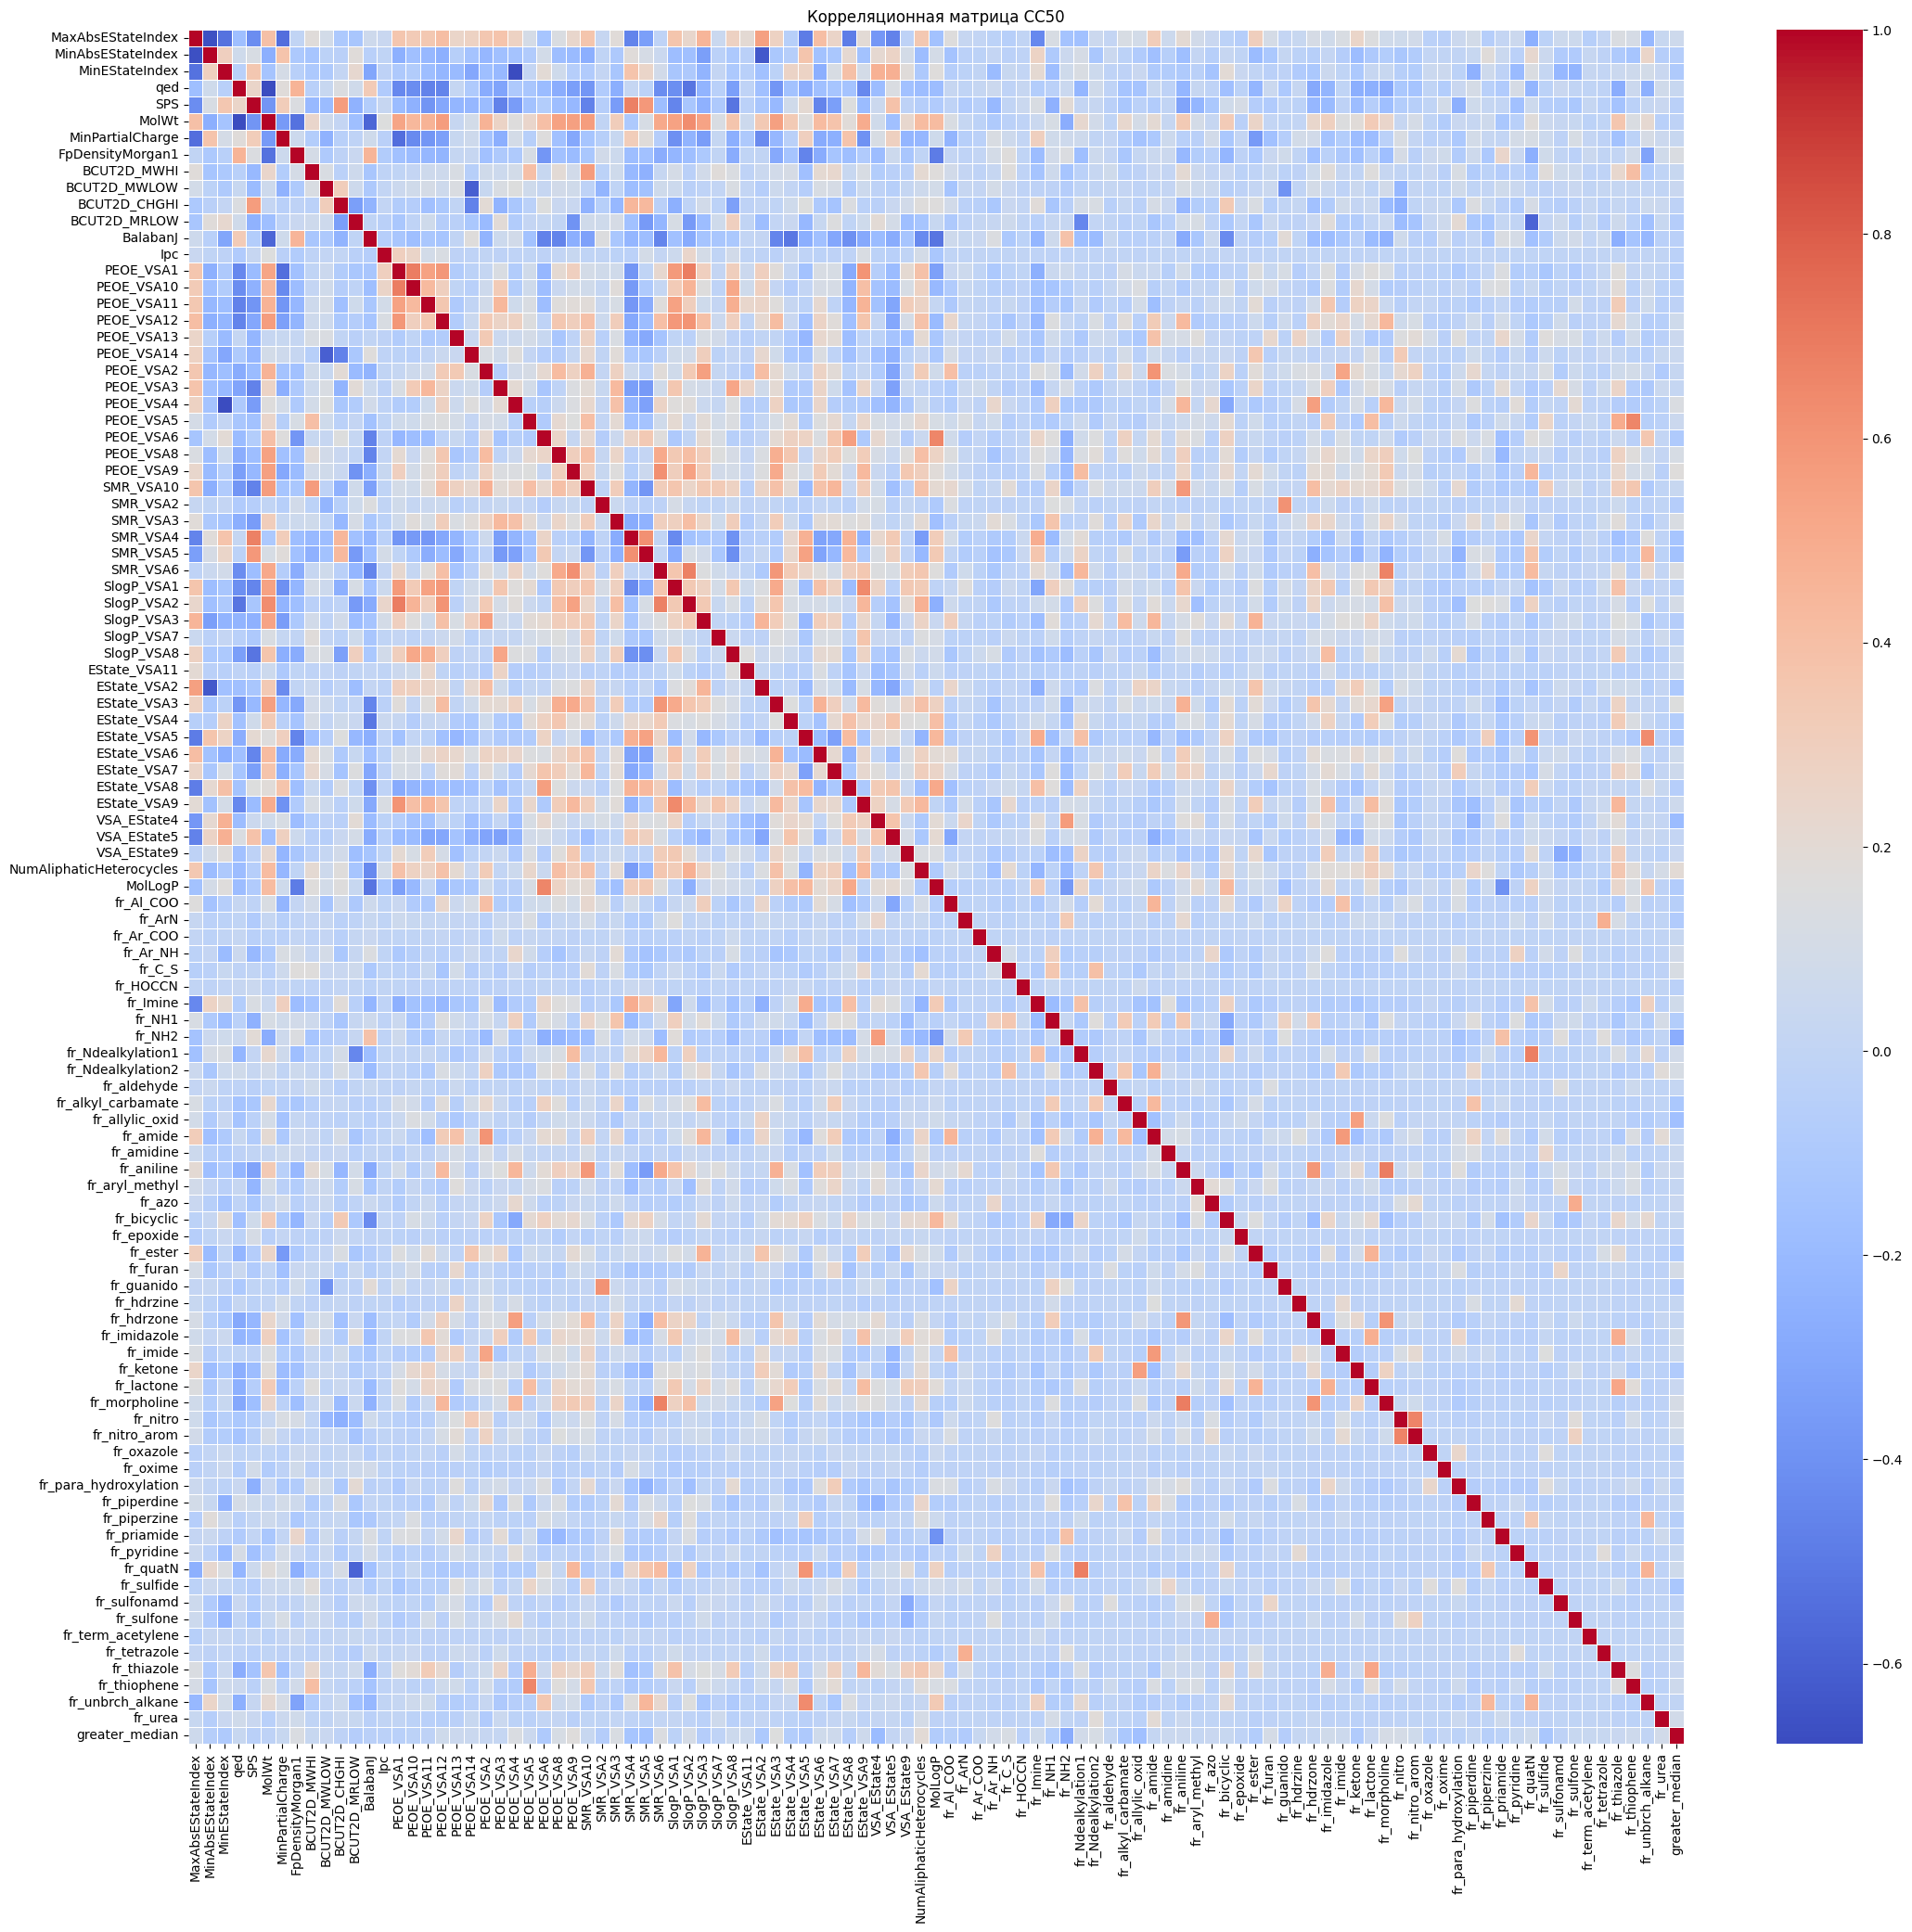

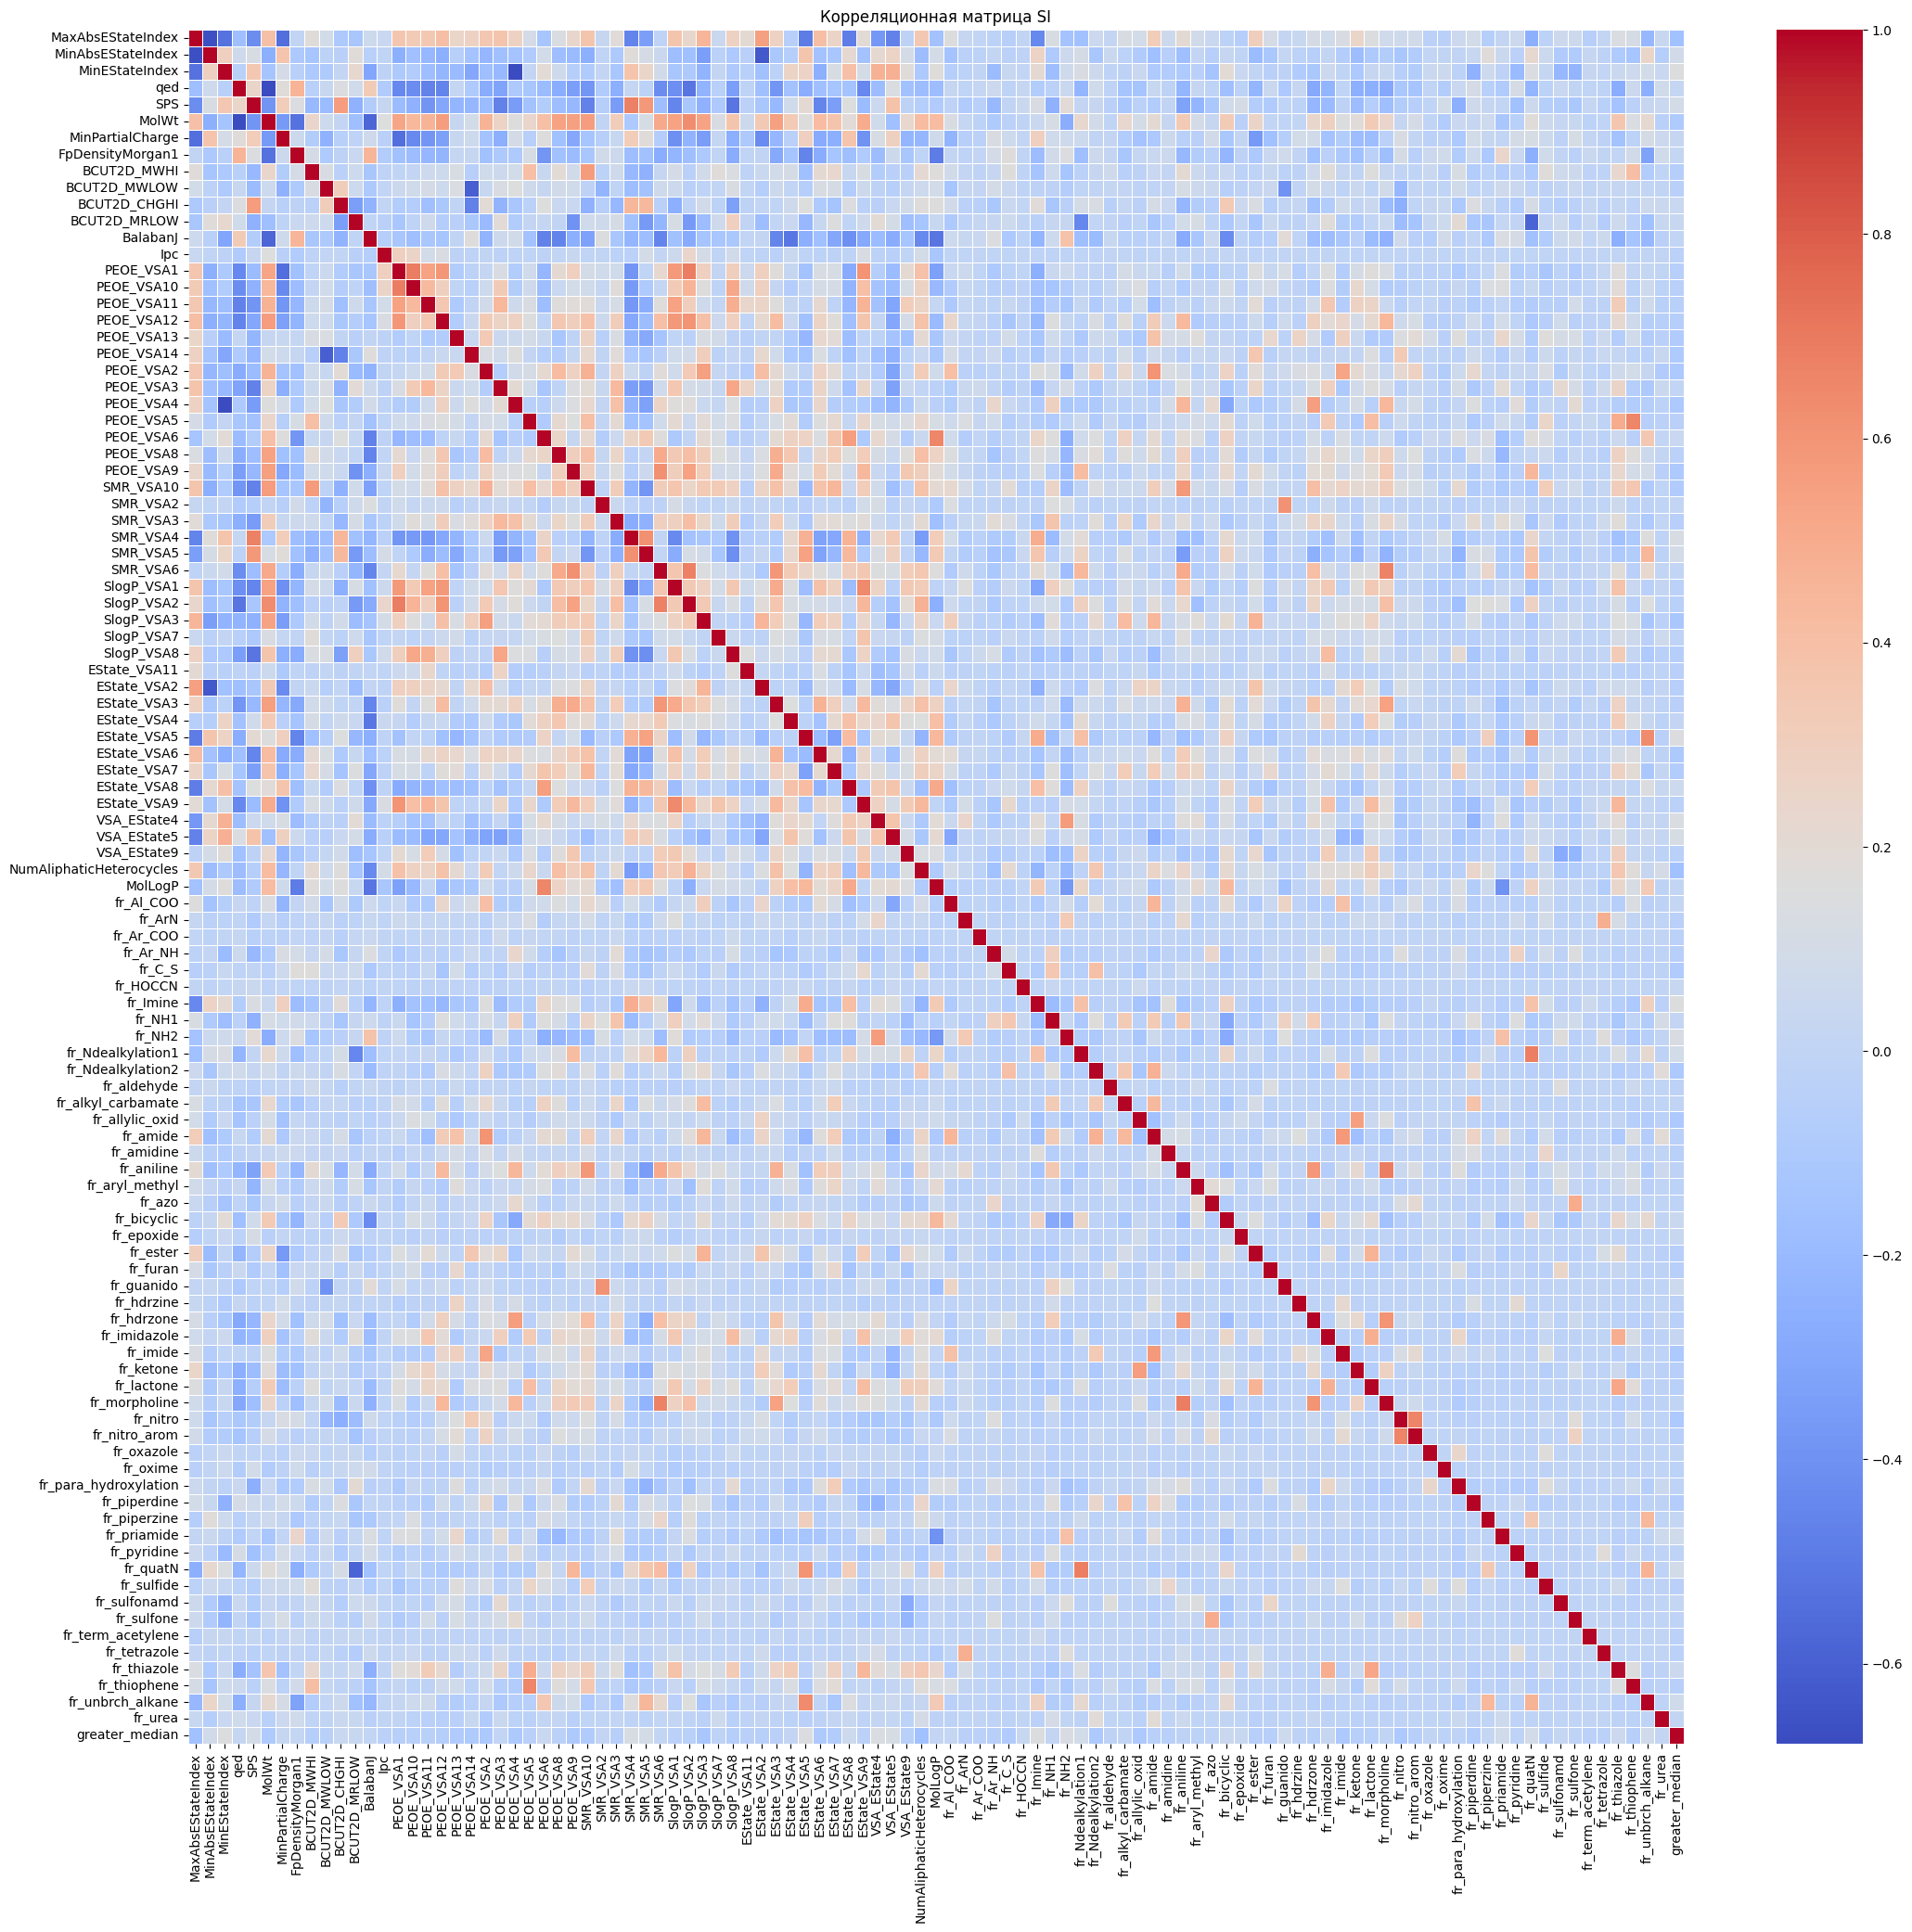

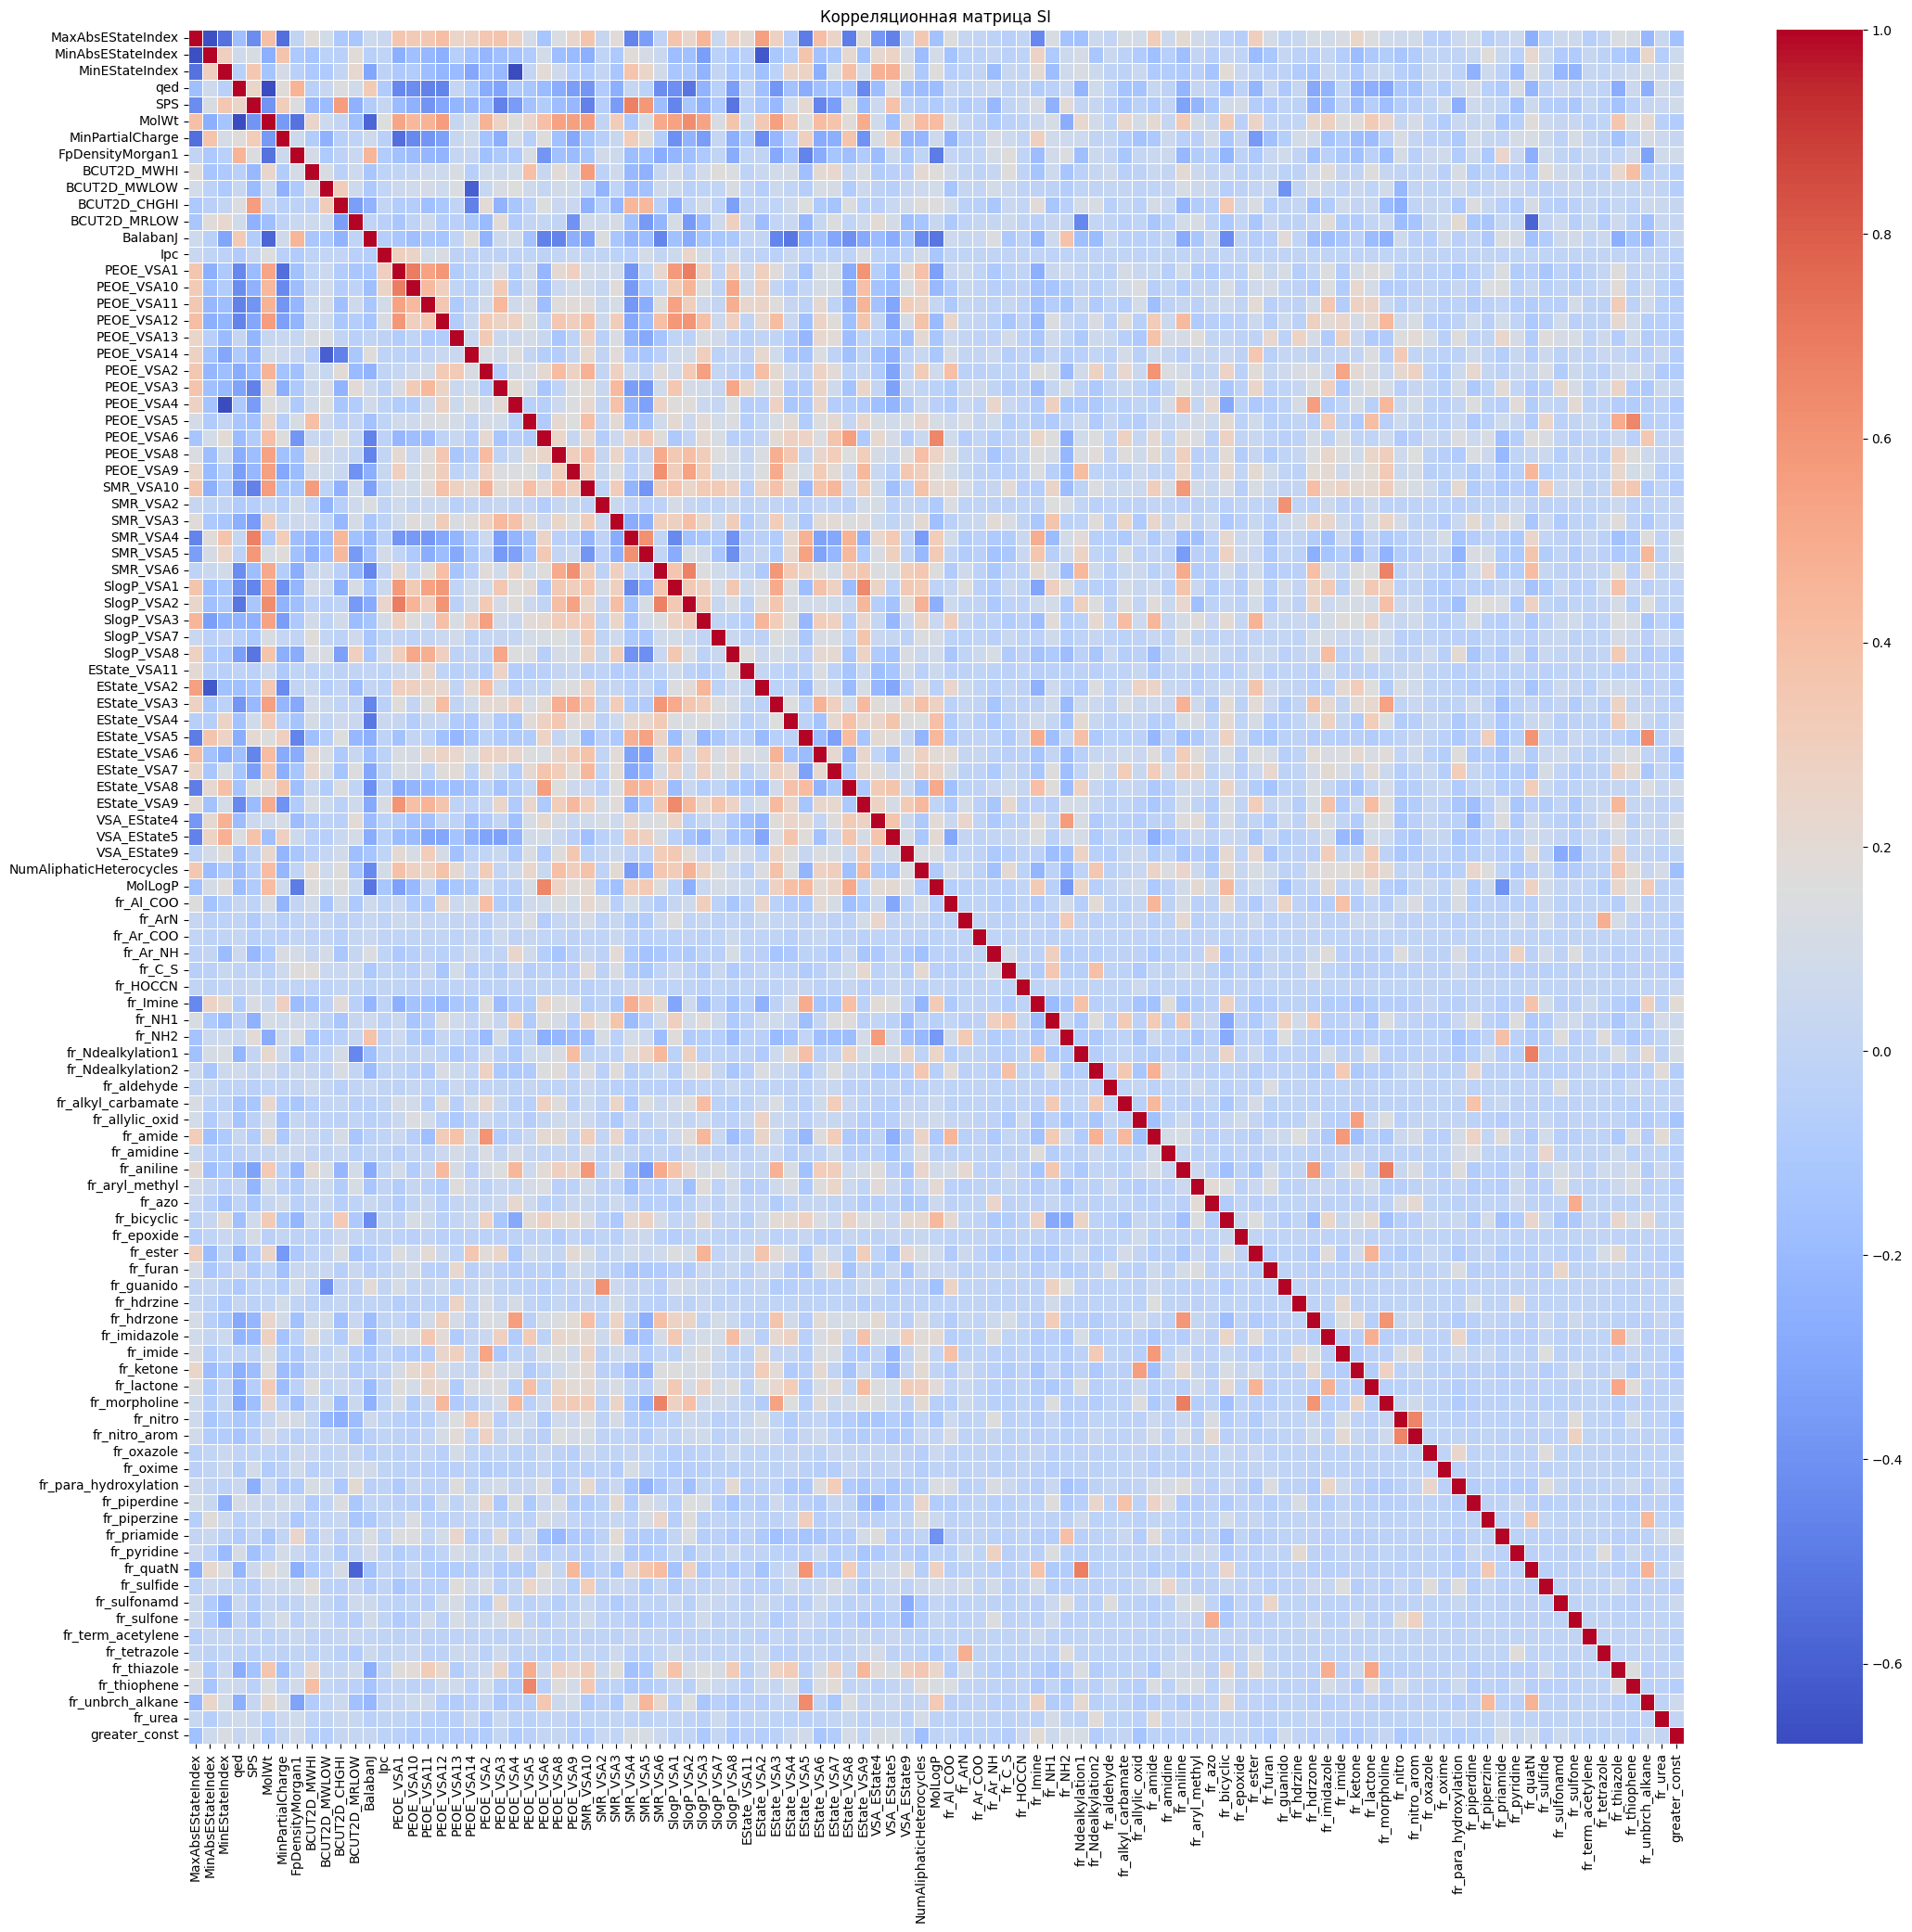

In [437]:
plt.figure(figsize=(26, 24))
sns.heatmap(df_IC50_median_corr, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица IC50')
plt.show()

plt.figure(figsize=(26, 24))
sns.heatmap(df_CC50_median_corr, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица CC50')
plt.show()

plt.figure(figsize=(26, 24))
sns.heatmap(df_SI_median_corr, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица SI')
plt.show()

plt.figure(figsize=(26, 24))
sns.heatmap(df_SI_const_corr, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица SI')
plt.show()

# Нормализуем все признаки кроме целевых переменных

In [438]:
def scale(df, target_col):
    scaler = MinMaxScaler()
    
    features = df.drop(columns=target_col)
    target = df[target_col]

    features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns, index=features.index)
    return pd.concat([target, features_scaled], axis=1)
    

In [439]:
df_IC50_norm = scale(df_IC50_clear, 'IC50, mM')
df_CC50_norm = scale(df_CC50_clear, 'CC50, mM')
df_SI_norm = scale(df_SI_clear, 'SI')

df_IC50_median_norm = scale(df_IC50_median_clear, 'greater_median')
df_CC50_median_norm = scale(df_CC50_median_clear, 'greater_median')
df_SI_median_norm = scale(df_SI_median_clear, 'greater_median')
df_SI_const_norm = scale(df_SI_const_clear, 'greater_const')

# Итоговые датафреймы:

In [440]:
df_IC50_norm.head()

IC50, mM  CC50, mM        SI  MaxAbsEStateIndex  MinAbsEStateIndex  \
0    6.239374  0.038513  0.001800           0.203662           0.281677   
1    0.771831  0.001036  0.000447           0.120448           0.388360   
2  223.808778  0.035353  0.000045           0.022420           0.395171   
3    1.705624  0.023611  0.004047           0.203902           0.284134   
4  107.131532  0.030534  0.000082           0.207807           0.196742   

   MinEStateIndex       qed       SPS  MinPartialCharge  FpDensityMorgan1  \
0        0.881996  0.411854  0.658090          0.605495          0.279482   
1        0.899521  0.463780  0.703149          0.578774          0.255753   
2        0.900640  0.231779  0.643481          0.562422          0.226091   
3        0.882400  0.366367  0.637066          0.605495          0.264754   
4        0.868043  0.425295  0.531644          0.654265          0.251007   

   ...  fr_pyridine  fr_quatN  fr_sulfide  fr_sulfonamd  fr_sulfone  \
0  ...          0.0       0.0         0.0           0.0         0.0   
1  ...          0.0       0.0         0.0           0.0         0.0   
2  ...          0.0       0.5         0.0           0.0         0.0   
3  ...          0.0       0.0         0.0           0.0         0.0   
4  ...          0.0       0.0         0.0           0.0         0.0   

   fr_term_acetylene  fr_thiazole  fr_thiophene  fr_unbrch_alkane  fr_urea  
0                0.0          0.0           0.0              0.15      0.0  
1                0.0          0.0           0.0              0.15      0.0  
2                0.0          0.0           0.0              0.15      0.0  
3                0.0          0.0           0.0              0.20      0.0  
4                0.0          0.0           0.0              0.00      0.0  

[5 rows x 102 columns]

In [441]:
df_CC50_norm.head()

CC50, mM  IC50, mM        SI  MaxAbsEStateIndex  MinAbsEStateIndex  \
0  175.482382  0.003220  0.001800           0.203662           0.281677   
1    5.402819  0.000397  0.000447           0.120448           0.388360   
2  161.142320  0.115581  0.000045           0.022420           0.395171   
3  107.855654  0.000879  0.004047           0.203902           0.284134   
4  139.270991  0.055325  0.000082           0.207807           0.196742   

   MinEStateIndex       qed       SPS  MinPartialCharge  FpDensityMorgan1  \
0        0.881996  0.403059  0.658956          0.605495          0.278361   
1        0.899521  0.453877  0.703901          0.578774          0.254727   
2        0.900640  0.226829  0.644384          0.562422          0.225184   
3        0.882400  0.358544  0.637985          0.605495          0.263692   
4        0.868043  0.416213  0.532830          0.654265          0.250000   

   ...  fr_quatN  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
0  ...       0.0         0.0           0.0         0.0                0.0   
1  ...       0.0         0.0           0.0         0.0                0.0   
2  ...       0.5         0.0           0.0         0.0                0.0   
3  ...       0.0         0.0           0.0         0.0                0.0   
4  ...       0.0         0.0           0.0         0.0                0.0   

   fr_tetrazole  fr_thiazole  fr_thiophene  fr_unbrch_alkane  fr_urea  
0           0.0          0.0           0.0              0.15      0.0  
1           0.0          0.0           0.0              0.15      0.0  
2           0.0          0.0           0.0              0.15      0.0  
3           0.0          0.0           0.0              0.20      0.0  
4           0.0          0.0           0.0              0.00      0.0  

[5 rows x 103 columns]

In [442]:
df_SI_norm.head()

SI  IC50, mM  CC50, mM  MaxAbsEStateIndex  MinAbsEStateIndex  \
0  28.125  0.001485  0.038513           0.203662           0.281421   
1   7.000  0.000161  0.001036           0.120448           0.388142   
2   0.720  0.054185  0.035353           0.022420           0.394956   
4   1.300  0.025923  0.030534           0.207807           0.196457   
5   2.000  0.003616  0.006473           0.252467           0.201993   

   MinEStateIndex       qed       SPS     MolWt  MinPartialCharge  ...  \
0        0.881996  0.403059  0.658956  0.345443          0.605495  ...   
1        0.899521  0.453877  0.703901  0.350517          0.578774  ...   
2        0.900640  0.226829  0.644384  0.423664          0.562422  ...   
4        0.868043  0.416213  0.532830  0.448713          0.654265  ...   
5        0.868952  0.733859  0.377208  0.279800          0.464100  ...   

   fr_quatN  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
0       0.0         0.0           0.0         0.0                0.0   
1       0.0         0.0           0.0         0.0                0.0   
2       0.5         0.0           0.0         0.0                0.0   
4       0.0         0.0           0.0         0.0                0.0   
5       0.0         0.0           0.0         0.0                0.0   

   fr_tetrazole  fr_thiazole  fr_thiophene  fr_unbrch_alkane  fr_urea  
0           0.0          0.0           0.0              0.15      0.0  
1           0.0          0.0           0.0              0.15      0.0  
2           0.0          0.0           0.0              0.15      0.0  
4           0.0          0.0           0.0              0.00      0.0  
5           0.0          0.0           0.0              0.00      0.0  

[5 rows x 105 columns]

In [443]:
df_IC50_median_norm.head()

greater_median  MaxAbsEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0               0           0.203662           0.281677        0.881996   
1               0           0.120448           0.388360        0.899521   
2               1           0.022420           0.395171        0.900640   
3               0           0.203902           0.284134        0.882400   
4               1           0.207807           0.196742        0.868043   

        qed       SPS     MolWt  MinPartialCharge  FpDensityMorgan1  \
0  0.403059  0.658956  0.345443          0.605495          0.275325   
1  0.453877  0.703901  0.350517          0.578774          0.251948   
2  0.226829  0.644384  0.423664          0.562422          0.222727   
3  0.358544  0.637985  0.363095          0.605495          0.260815   
4  0.416213  0.532830  0.448713          0.654265          0.247273   

   BCUT2D_MWHI  ...  fr_quatN  fr_sulfide  fr_sulfonamd  fr_sulfone  \
0     0.116791  ...       0.0         0.0           0.0         0.0   
1     0.117995  ...       0.0         0.0           0.0         0.0   
2     0.120980  ...       0.5         0.0           0.0         0.0   
3     0.116783  ...       0.0         0.0           0.0         0.0   
4     0.116861  ...       0.0         0.0           0.0         0.0   

   fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiophene  \
0                0.0           0.0          0.0           0.0   
1                0.0           0.0          0.0           0.0   
2                0.0           0.0          0.0           0.0   
3                0.0           0.0          0.0           0.0   
4                0.0           0.0          0.0           0.0   

   fr_unbrch_alkane  fr_urea  
0              0.15      0.0  
1              0.15      0.0  
2              0.15      0.0  
3              0.20      0.0  
4              0.00      0.0  

[5 rows x 103 columns]

In [444]:
df_CC50_median_norm.head()

greater_median  MaxAbsEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0               0           0.203662           0.281677        0.881996   
1               0           0.120448           0.388360        0.899521   
2               0           0.022420           0.395171        0.900640   
3               0           0.203902           0.284134        0.882400   
4               0           0.207807           0.196742        0.868043   

        qed       SPS     MolWt  MinPartialCharge  FpDensityMorgan1  \
0  0.403059  0.658956  0.345443          0.605495          0.275325   
1  0.453877  0.703901  0.350517          0.578774          0.251948   
2  0.226829  0.644384  0.423664          0.562422          0.222727   
3  0.358544  0.637985  0.363095          0.605495          0.260815   
4  0.416213  0.532830  0.448713          0.654265          0.247273   

   BCUT2D_MWHI  ...  fr_quatN  fr_sulfide  fr_sulfonamd  fr_sulfone  \
0     0.116791  ...       0.0         0.0           0.0         0.0   
1     0.117995  ...       0.0         0.0           0.0         0.0   
2     0.120980  ...       0.5         0.0           0.0         0.0   
3     0.116783  ...       0.0         0.0           0.0         0.0   
4     0.116861  ...       0.0         0.0           0.0         0.0   

   fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiophene  \
0                0.0           0.0          0.0           0.0   
1                0.0           0.0          0.0           0.0   
2                0.0           0.0          0.0           0.0   
3                0.0           0.0          0.0           0.0   
4                0.0           0.0          0.0           0.0   

   fr_unbrch_alkane  fr_urea  
0              0.15      0.0  
1              0.15      0.0  
2              0.15      0.0  
3              0.20      0.0  
4              0.00      0.0  

[5 rows x 103 columns]

In [445]:
df_SI_median_norm.head()

greater_median  MaxAbsEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0               1           0.203662           0.281677        0.881996   
1               1           0.120448           0.388360        0.899521   
2               0           0.022420           0.395171        0.900640   
3               1           0.203902           0.284134        0.882400   
4               0           0.207807           0.196742        0.868043   

        qed       SPS     MolWt  MinPartialCharge  FpDensityMorgan1  \
0  0.403059  0.658956  0.345443          0.605495          0.275325   
1  0.453877  0.703901  0.350517          0.578774          0.251948   
2  0.226829  0.644384  0.423664          0.562422          0.222727   
3  0.358544  0.637985  0.363095          0.605495          0.260815   
4  0.416213  0.532830  0.448713          0.654265          0.247273   

   BCUT2D_MWHI  ...  fr_quatN  fr_sulfide  fr_sulfonamd  fr_sulfone  \
0     0.116791  ...       0.0         0.0           0.0         0.0   
1     0.117995  ...       0.0         0.0           0.0         0.0   
2     0.120980  ...       0.5         0.0           0.0         0.0   
3     0.116783  ...       0.0         0.0           0.0         0.0   
4     0.116861  ...       0.0         0.0           0.0         0.0   

   fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiophene  \
0                0.0           0.0          0.0           0.0   
1                0.0           0.0          0.0           0.0   
2                0.0           0.0          0.0           0.0   
3                0.0           0.0          0.0           0.0   
4                0.0           0.0          0.0           0.0   

   fr_unbrch_alkane  fr_urea  
0              0.15      0.0  
1              0.15      0.0  
2              0.15      0.0  
3              0.20      0.0  
4              0.00      0.0  

[5 rows x 103 columns]

In [446]:
df_SI_const_norm.head()

greater_const  MaxAbsEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0              1           0.203662           0.281677        0.881996   
1              0           0.120448           0.388360        0.899521   
2              0           0.022420           0.395171        0.900640   
3              1           0.203902           0.284134        0.882400   
4              0           0.207807           0.196742        0.868043   

        qed       SPS     MolWt  MinPartialCharge  FpDensityMorgan1  \
0  0.403059  0.658956  0.345443          0.605495          0.275325   
1  0.453877  0.703901  0.350517          0.578774          0.251948   
2  0.226829  0.644384  0.423664          0.562422          0.222727   
3  0.358544  0.637985  0.363095          0.605495          0.260815   
4  0.416213  0.532830  0.448713          0.654265          0.247273   

   BCUT2D_MWHI  ...  fr_quatN  fr_sulfide  fr_sulfonamd  fr_sulfone  \
0     0.116791  ...       0.0         0.0           0.0         0.0   
1     0.117995  ...       0.0         0.0           0.0         0.0   
2     0.120980  ...       0.5         0.0           0.0         0.0   
3     0.116783  ...       0.0         0.0           0.0         0.0   
4     0.116861  ...       0.0         0.0           0.0         0.0   

   fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiophene  \
0                0.0           0.0          0.0           0.0   
1                0.0           0.0          0.0           0.0   
2                0.0           0.0          0.0           0.0   
3                0.0           0.0          0.0           0.0   
4                0.0           0.0          0.0           0.0   

   fr_unbrch_alkane  fr_urea  
0              0.15      0.0  
1              0.15      0.0  
2              0.15      0.0  
3              0.20      0.0  
4              0.00      0.0  

[5 rows x 103 columns]

# Сохранение результатов:

In [447]:
df_IC50_norm.to_csv('D:\\notebooks\\sem2\\Classic_MO\\course\\df_IC50.csv', index=False, encoding='utf-8')
df_CC50_norm.to_csv('D:\\notebooks\\sem2\\Classic_MO\\course\\df_CC50.csv', index=False, encoding='utf-8')
df_SI_norm.to_csv('D:\\notebooks\\sem2\\Classic_MO\\course\\df_SI.csv', index=False, encoding='utf-8')

df_IC50_median_norm.to_csv('D:\\notebooks\\sem2\\Classic_MO\\course\\df_IC50_median.csv', index=False, encoding='utf-8')
df_CC50_median_norm.to_csv('D:\\notebooks\\sem2\\Classic_MO\\course\\df_CC50_median.csv', index=False, encoding='utf-8')
df_SI_median_norm.to_csv('D:\\notebooks\\sem2\\Classic_MO\\course\\df_SI_median.csv', index=False, encoding='utf-8')
df_SI_const_norm.to_csv('D:\\notebooks\\sem2\\Classic_MO\\course\\df_SI_const.csv', index=False, encoding='utf-8')